<a href="https://colab.research.google.com/github/JCaballerot/Credit-Scoring/blob/main/CreditScoring/01.%20Lab_Automobile_Loan_Default_logistic_Reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<h1 align=center><font size = 5>Automobile Loan Default Dataset
</font></h1>

---

## Introducción

En este laboratorio, aprenderá a usar python para construir un modelo de <b>credit scoring</b>.



## Objetivo de este Notebook

1. Como construir e interpretar un modelo de regresión logística.
2. Descargar y limpiar un Dataset
3. Realizar los pasos necesarios previos a la etapa de modelamiento
4. Entrenar y Testear modelo

## Tabla de Contenidos

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>
    
1. <a href="#item31">Contexto</a>  
2. <a href="#item32">Descargar y limpiar el Dataset</a>  
3. <a href="#item33">Pre-selección de variables</a>  
4. <a href="#item34">Tratamiento de variables categóricas</a>  
5. <a href="#item34">Tratamiento de variables numéricas</a>  
6. <a href="#item34">Entrenamiento del modelo</a>  

</font>
</div>

## 1. Contexto

Una institución financiera no bancaria (NBFI) o una compañía financiera no bancaria (NBFC) es una institución financiera que no tiene una licencia bancaria completa o no está supervisada por una agencia reguladora bancaria nacional o internacional. NBFC facilita los servicios financieros relacionados con los bancos, como inversión, agrupación de riesgos, ahorros contractuales y corretaje de mercado.

Una NBFI está luchando por marcar ganancias debido a un aumento en los incumplimientos en la categoría de préstamos para vehículos. La empresa tiene como objetivo determinar la capacidad de pago del préstamo del cliente y comprender la importancia relativa de cada parámetro que contribuye a la capacidad del prestatario para pagar el préstamo.



<b>Meta:</b>

El objetivo del problema es predecir si un cliente no cumplirá con el pago del préstamo del vehículo o no.




<img src="https://storage.googleapis.com/kaggle-datasets-images/1205706/2014650/7a50061003ce0de9839d54ff4673ccf2/dataset-cover.jpg?t=2021-07-04-09-18-01" alt="HTML5 Icon" style="width: 600px; height: 450px;">
<div style="text-align: center">¿Cómo identificaremos a los clientes morosos? </div>


<b>Descripción de datos</b>

El data frame de Automovile Loan tiene 121,856 filas y 40 columnas.


---

Se le proporciona un conjunto de datos anónimos que contiene una gran cantidad de variables. La columna <b>"Default"</b> es la variable a predecir. Es igual a uno para clientes que cayeron en mora y 0 para clientes que no.

La tarea consiste en predecir la probabilidad de que cada cliente del conjunto de prueba sea un cliente moroso.


---


<strong>Puede consultar este [link](https://www.kaggle.com/datasets/saurabhbagchi/dish-network-hackathon) para leer más sobre la fuente de datos Automobile Loan Default.</strong>


## 2. Descargar y limpiar Dataset

In [5]:
# Principales librerías

# Imports comunes
import pandas as pd
import numpy as np

# Cargar seaborn
import seaborn as sns

# Configuración de gráficos matplotlib
import matplotlib.pyplot as plt

# Ignore las advertencias poco útiles
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [6]:
# Cargar Data

pddf = pd.read_csv("Train_Dataset.csv")
pddf.head()


<ipython-input-6-8ce9326fe27e>:3: DtypeWarning: Columns (1,7,8,16,17,18,19,20,35) have mixed types. Specify dtype option on import or set low_memory=False.
  pddf = pd.read_csv("Train_Dataset.csv")


,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,...,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau,Default
0,12142509,6750,0.0,0.0,1.0,0.0,0.0,61190.55,3416.85,Alone,...,Yes,Yes,Self-employed,0.568066,0.478787,NaN,0.0186,63.0,NaN,0
1,12138936,20250,1.0,0.0,1.0,NaN,0.0,15282,1826.55,Alone,...,Yes,Yes,Government,0.563360,0.215068,NaN,NaN,NaN,NaN,0
2,12181264,18000,0.0,0.0,1.0,0.0,1.0,59527.35,2788.2,Alone,...,Yes,Yes,Self-employed,NaN,0.552795,0.329655,0.0742,277.0,0.0,0
3,12188929,15750,0.0,0.0,1.0,1.0,0.0,53870.4,2295.45,Alone,...,Yes,Yes,XNA,NaN,0.135182,0.631355,NaN,1700.0,3.0,0
4,12133385,33750,1.0,0.0,1.0,0.0,2.0,133988.4,3547.35,Alone,...,Yes,Yes,Business Entity Type 3,0.508199,0.301182,0.355639,0.2021,674.0,1.0,0


In [7]:

# Generamos la lista de codmes desde 202109 a 202208
start_year = 2021
end_year = 2022
months = [year*100 + month for year in range(start_year, end_year + 1) for month in range(1, 13) if year*100 + month >= 202109 and year*100 + month <= 202208]

# Calculamos cuántas filas le corresponderán a cada valor de codmes
values_per_month = len(pddf) // len(months)

# Repetimos los valores de codmes por la cantidad de filas correspondiente
codmes_column = sum([[month] * values_per_month for month in months], [])[:len(pddf)]

# En caso de que haya un residuo debido a la división
residue = len(pddf) - len(codmes_column)
if residue > 0:
    codmes_column.extend(months[:residue])

pddf['codmes'] = codmes_column


In [ ]:
pddf.head()

In [9]:
pddf.columns.tolist()

['ID',
 'Client_Income',
 'Car_Owned',
 'Bike_Owned',
 'Active_Loan',
 'House_Own',
 'Child_Count',
 'Credit_Amount',
 'Loan_Annuity',
 'Accompany_Client',
 'Client_Income_Type',
 'Client_Education',
 'Client_Marital_Status',
 'Client_Gender',
 'Loan_Contract_Type',
 'Client_Housing_Type',
 'Population_Region_Relative',
 'Age_Days',
 'Employed_Days',
 'Registration_Days',
 'ID_Days',
 'Own_House_Age',
 'Mobile_Tag',
 'Homephone_Tag',
 'Workphone_Working',
 'Client_Occupation',
 'Client_Family_Members',
 'Cleint_City_Rating',
 'Application_Process_Day',
 'Application_Process_Hour',
 'Client_Permanent_Match_Tag',
 'Client_Contact_Work_Tag',
 'Type_Organization',
 'Score_Source_1',
 'Score_Source_2',
 'Score_Source_3',
 'Social_Circle_Default',
 'Phone_Change',
 'Credit_Bureau',
 'Default',
 'codmes']

In [10]:
pddf.groupby('codmes').agg({'ID' : 'count',
                            'Default': 'mean'})

,ID,Default
codmes,,
202109,10155,0.079961
202110,10155,0.079468
202111,10155,0.085081
202112,10155,0.085278
202201,10155,0.075726
202202,10155,0.079567
202203,10155,0.081635
202204,10155,0.079665
202205,10154,0.079575


<Axes: xlabel='Default', ylabel='count'>

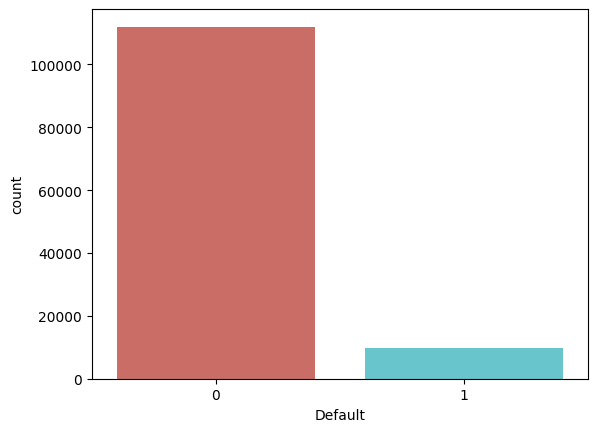

In [11]:
# Analizando el target
sns.countplot(x='Default', data = pddf, palette = 'hls')

In [12]:
# Indentificar las variables

features = list(set(pddf.columns.tolist()) - set(['ID','Default']))
features

['Credit_Bureau',
 'Child_Count',
 'Application_Process_Day',
 'Score_Source_2',
 'Bike_Owned',
 'Loan_Contract_Type',
 'Application_Process_Hour',
 'Client_Contact_Work_Tag',
 'Mobile_Tag',
 'Active_Loan',
 'codmes',
 'ID_Days',
 'Client_Permanent_Match_Tag',
 'Client_Family_Members',
 'Homephone_Tag',
 'Cleint_City_Rating',
 'Accompany_Client',
 'Client_Housing_Type',
 'Client_Gender',
 'Client_Income_Type',
 'Social_Circle_Default',
 'Car_Owned',
 'Workphone_Working',
 'Loan_Annuity',
 'Credit_Amount',
 'Client_Occupation',
 'Employed_Days',
 'House_Own',
 'Client_Education',
 'Age_Days',
 'Population_Region_Relative',
 'Client_Marital_Status',
 'Type_Organization',
 'Score_Source_3',
 'Registration_Days',
 'Own_House_Age',
 'Phone_Change',
 'Score_Source_1',
 'Client_Income']

In [13]:
features_string = list(pddf.select_dtypes(include=['object']).columns)
features_string

['Client_Income',
 'Credit_Amount',
 'Loan_Annuity',
 'Accompany_Client',
 'Client_Income_Type',
 'Client_Education',
 'Client_Marital_Status',
 'Client_Gender',
 'Loan_Contract_Type',
 'Client_Housing_Type',
 'Population_Region_Relative',
 'Age_Days',
 'Employed_Days',
 'Registration_Days',
 'ID_Days',
 'Client_Occupation',
 'Client_Permanent_Match_Tag',
 'Client_Contact_Work_Tag',
 'Type_Organization',
 'Score_Source_3']

In [14]:
pddf.convert_dtypes(infer_objects=True).dtypes

ID                              Int64
Client_Income                  object
Car_Owned                       Int64
Bike_Owned                      Int64
Active_Loan                     Int64
House_Own                       Int64
Child_Count                     Int64
Credit_Amount                  object
Loan_Annuity                   object
Accompany_Client               string
Client_Income_Type             string
Client_Education               string
Client_Marital_Status          string
Client_Gender                  string
Loan_Contract_Type             string
Client_Housing_Type            string
Population_Region_Relative     object
Age_Days                       object
Employed_Days                  object
Registration_Days              object
ID_Days                        object
Own_House_Age                   Int64
Mobile_Tag                      Int64
Homephone_Tag                   Int64
Workphone_Working               Int64
Client_Occupation              string
Client_Famil

In [15]:
categorical_features = ['Accompany_Client', 'Client_Income_Type',
                        'Client_Education', 'Client_Marital_Status',
                        'Client_Gender', 'Loan_Contract_Type', 'Client_Housing_Type',
                        'Client_Occupation', 'Client_Permanent_Match_Tag',
                        'Client_Contact_Work_Tag', 'Type_Organization']

In [16]:
numeric_features = list(set(features) - set(categorical_features))
numeric_features

['Credit_Bureau',
 'Child_Count',
 'Application_Process_Day',
 'Score_Source_2',
 'Bike_Owned',
 'Application_Process_Hour',
 'Mobile_Tag',
 'Active_Loan',
 'codmes',
 'ID_Days',
 'Client_Family_Members',
 'Homephone_Tag',
 'Cleint_City_Rating',
 'Social_Circle_Default',
 'Car_Owned',
 'Workphone_Working',
 'Loan_Annuity',
 'Credit_Amount',
 'Employed_Days',
 'House_Own',
 'Age_Days',
 'Population_Region_Relative',
 'Score_Source_3',
 'Registration_Days',
 'Own_House_Age',
 'Phone_Change',
 'Score_Source_1',
 'Client_Income']

In [17]:
pddf.replace({'@': None,
              '#': None,
              '&': None,
              'x': None,
              '$': None,
              'XNA' : None,
              '#VALUE!': None}, inplace = True)

In [18]:
# convert Series

for col in numeric_features:
  pddf[col] = pd.to_numeric(pddf[col])


In [19]:
pddf.dtypes

ID                              int64
Client_Income                 float64
Car_Owned                     float64
Bike_Owned                    float64
Active_Loan                   float64
House_Own                     float64
Child_Count                   float64
Credit_Amount                 float64
Loan_Annuity                  float64
Accompany_Client               object
Client_Income_Type             object
Client_Education               object
Client_Marital_Status          object
Client_Gender                  object
Loan_Contract_Type             object
Client_Housing_Type            object
Population_Region_Relative    float64
Age_Days                      float64
Employed_Days                 float64
Registration_Days             float64
ID_Days                       float64
Own_House_Age                 float64
Mobile_Tag                      int64
Homephone_Tag                   int64
Workphone_Working               int64
Client_Occupation              object
Client_Famil

In [20]:
pddf.to_csv('loan_default.csv', index = 0)

In [21]:
# Determinando matrices de datos
X = pddf[features + ['ID', 'Default']]
y = pddf.Default


In [22]:
# Muestreo de data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify = y,
                                                    train_size = 0.7,
                                                    random_state = 123)


## 3. Pre-selección de variables

In [23]:
# Estadísticos básicos
df_res = X_train[numeric_features].describe().transpose()
df_res.head()

,count,mean,std,min,25%,50%,75%,max
Credit_Bureau,72339.0,1.892313,1.862089,0.000000,0.000000,1.00000,3.00000,22.0
Child_Count,82807.0,0.415895,0.724959,0.000000,0.000000,0.00000,1.00000,19.0
Application_Process_Day,83605.0,3.162801,1.758039,0.000000,2.000000,3.00000,5.00000,6.0
Score_Source_2,81359.0,0.518766,0.723443,0.000005,0.390915,0.56544,0.66399,100.0
Bike_Owned,82816.0,0.331554,0.470775,0.000000,0.000000,0.00000,1.00000,1.0


In [24]:
# Dando formato a la data

df_res.reset_index(inplace = True)
df_res.rename(columns = {'index': 'feature',
                         '25%': 'Q1',
                         '50%': 'Median',
                         '75%': 'Q3'}, inplace = True)
df_res.head()

,feature,count,mean,std,min,Q1,Median,Q3,max
0,Credit_Bureau,72339.0,1.892313,1.862089,0.000000,0.000000,1.00000,3.00000,22.0
1,Child_Count,82807.0,0.415895,0.724959,0.000000,0.000000,0.00000,1.00000,19.0
2,Application_Process_Day,83605.0,3.162801,1.758039,0.000000,2.000000,3.00000,5.00000,6.0
3,Score_Source_2,81359.0,0.518766,0.723443,0.000005,0.390915,0.56544,0.66399,100.0
4,Bike_Owned,82816.0,0.331554,0.470775,0.000000,0.000000,0.00000,1.00000,1.0


In [25]:
# Calculando el porcentaje de missings
df_res['missing_rate'] = 1 - df_res['count']/len(X_train)
df_res.sort_values(by = 'missing_rate', ascending = False, inplace = True)
df_res.tail(10)

,feature,count,mean,std,min,Q1,Median,Q3,max,missing_rate
14,Car_Owned,82806.0,0.344009,0.475047,0.0,0.0,0.0,1.0,1.0,0.029227
1,Child_Count,82807.0,0.415895,0.724959,0.0,0.0,0.0,1.0,19.0,0.029215
4,Bike_Owned,82816.0,0.331554,0.470775,0.0,0.0,0.0,1.0,1.0,0.029109
2,Application_Process_Day,83605.0,3.162801,1.758039,0.0,2.0,3.0,5.0,6.0,0.019860
10,Client_Family_Members,83621.0,2.152091,0.909934,1.0,2.0,2.0,3.0,16.0,0.019672
12,Cleint_City_Rating,83633.0,2.030443,0.504363,1.0,2.0,2.0,2.0,3.0,0.019531
15,Workphone_Working,85299.0,0.281926,0.449940,0.0,0.0,0.0,1.0,1.0,0.000000
11,Homephone_Tag,85299.0,0.200835,0.400627,0.0,0.0,0.0,0.0,1.0,0.000000
8,codmes,85299.0,202173.091420,44.391565,202109.0,202111.0,202203.0,202206.0,202208.0,0.000000
6,Mobile_Tag,85299.0,0.999988,0.003424,0.0,1.0,1.0,1.0,1.0,0.000000


<b> Medidas de apalancamiento</b>
  * Deuda nueva/ Ingresos o Ventas
  * Deuda que ya tiene + Deuda nueva/ Ingresos o Ventas
  * Deuda nueva/ Pasivos
  * Deuda que ya tiene + Deuda nueva/ Pasivos
  * Deuda nueva/ abonos o transacciones
  * Deuda que ya tiene + Deuda nueva/ abonos o transacciones
  * Deuda nueva/ deuda promedio en una ventana
  * Deuda que ya tiene + Deuda nueva/ deuda promedio en una ventana





In [26]:
X_train['apalancamiento'] = X_train.Credit_Amount/X_train.Client_Income
X_test['apalancamiento'] = X_test.Credit_Amount/X_test.Client_Income

In [27]:
from sklearn.metrics import *

auc = roc_auc_score(y_train, X_train.apalancamiento.fillna(X_train.apalancamiento.mean()))
gini = 2*auc - 1
gini

-0.008596587251002541

In [28]:
#Calculando el gini univariado de todas las variables
ginisZero = [roc_auc_score(y_train, X_train[col].fillna(0))*2-1 for col in numeric_features]


In [29]:
temp = X_train.copy()
temp['y'] = y_train

ginisNan = [roc_auc_score(temp[['y', col]].dropna().y,
                          temp[['y', col]].dropna()[col])*2-1 for col in numeric_features]


In [30]:
res_ginis = pd.DataFrame({'feature' : numeric_features,
                          'giniZero' : ginisZero,
                          'giniNan'  : ginisNan})

In [31]:
df_res2 = pd.merge(df_res, res_ginis, on = 'feature', how='left')
df_res2.head(10)

,feature,count,mean,std,min,Q1,Median,Q3,max,missing_rate,giniZero,giniNan
0,Own_House_Age,29326.0,12.214690,12.136193,0.000000,5.000000,9.00000,15.000000,69.000000,0.656198,-0.028796,0.130995
1,Score_Source_1,37130.0,0.500320,0.211204,0.014568,0.332750,0.50333,0.673347,0.945741,0.564708,-0.097251,-0.316251
2,Social_Circle_Default,42004.0,0.116864,0.107001,0.000000,0.057700,0.08760,0.148500,1.000000,0.507567,-0.097401,-0.083640
3,Score_Source_3,66516.0,0.511120,0.194368,0.000527,0.372334,0.53707,0.667458,0.896010,0.220202,-0.225921,-0.342416
4,Credit_Bureau,72339.0,1.892313,1.862089,0.000000,0.000000,1.00000,3.000000,22.000000,0.151936,0.001208,0.035580
5,ID_Days,81105.0,2986.966291,1512.753737,0.000000,1704.000000,3247.00000,4294.000000,7197.000000,0.049168,-0.110733,-0.122605
6,Score_Source_2,81359.0,0.518766,0.723443,0.000005,0.390915,0.56544,0.663990,100.000000,0.046190,-0.273964,-0.303939
7,Population_Region_Relative,81860.0,0.023335,0.494376,0.000533,0.010006,0.01885,0.028663,100.000000,0.040317,-0.063607,-0.066114
8,Loan_Annuity,81925.0,2724.754839,1466.162865,217.350000,1660.500000,2501.10000,3469.950000,22500.000000,0.039555,-0.003493,-0.005418
9,Registration_Days,82748.0,4980.901146,3517.494509,0.000000,2000.000000,4496.00000,7470.000000,23738.000000,0.029907,-0.068334,-0.075461


In [32]:
# Ordenando variables por importancia de explicación

df_res2['abs_giniZero'] = df_res2.giniZero.apply(lambda x: abs(x))
df_res2['abs_giniNan'] = df_res2.giniNan.apply(lambda x: abs(x))

df_res2['abs_ginimax'] = df_res2[['abs_giniZero', 'abs_giniNan']].max(axis = 1)
df_res2 = df_res2.sort_values('abs_ginimax', ascending = False)


Coeficiente de variación

In [33]:
df_res2['cv'] = df_res2['std']/df_res2['mean']
df_res2.head()

,feature,count,mean,std,min,Q1,Median,Q3,max,missing_rate,giniZero,giniNan,abs_giniZero,abs_giniNan,abs_ginimax,cv
3,Score_Source_3,66516.0,0.511120,0.194368,0.000527,0.372334,0.53707,0.667458,0.896010,0.220202,-0.225921,-0.342416,0.225921,0.342416,0.342416,0.380279
1,Score_Source_1,37130.0,0.500320,0.211204,0.014568,0.332750,0.50333,0.673347,0.945741,0.564708,-0.097251,-0.316251,0.097251,0.316251,0.316251,0.422138
6,Score_Source_2,81359.0,0.518766,0.723443,0.000005,0.390915,0.56544,0.663990,100.000000,0.046190,-0.273964,-0.303939,0.273964,0.303939,0.303939,1.394546
12,Employed_Days,82761.0,67160.180641,138977.268774,0.000000,931.000000,2211.00000,5625.000000,365243.000000,0.029754,-0.172016,-0.183437,0.172016,0.183437,0.183437,2.069340
15,Age_Days,82785.0,16030.353482,4367.969719,7676.000000,12399.000000,15736.00000,19671.000000,25201.000000,0.029473,-0.146395,-0.155875,0.146395,0.155875,0.155875,0.272481


In [34]:
df_res2.to_csv('univariate_assesment.csv', index = 0)

In [35]:
len(df_res2)

28

In [36]:
len(df_res2[(df_res2.abs_ginimax > 0.02) &
            (df_res2.missing_rate < 0.95)])

20

## 4. Tratamiento de variables categóricas

In [37]:
categorical_features

['Accompany_Client',
 'Client_Income_Type',
 'Client_Education',
 'Client_Marital_Status',
 'Client_Gender',
 'Loan_Contract_Type',
 'Client_Housing_Type',
 'Client_Occupation',
 'Client_Permanent_Match_Tag',
 'Client_Contact_Work_Tag',
 'Type_Organization']

<Axes: xlabel='Client_Marital_Status', ylabel='count'>

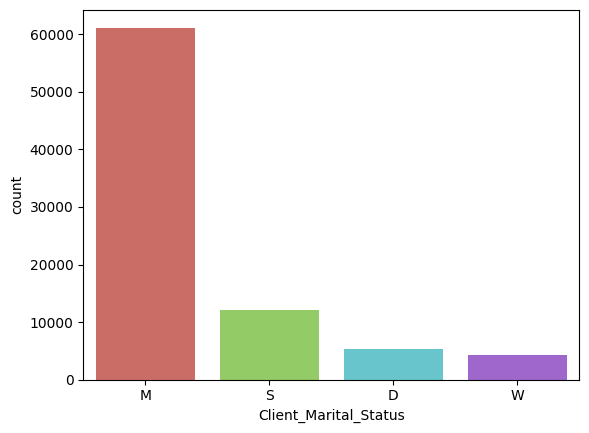

In [38]:
# Analizando variable categórica
sns.countplot(x='Client_Marital_Status', data = X_train, palette = 'hls')

In [39]:
mar_res = X_train.groupby(['Client_Marital_Status']).agg({"ID":"count",
                                                "Default" :"mean"}).reset_index()
mar_res

,Client_Marital_Status,ID,Default
0,D,5288,0.076021
1,M,61181,0.079208
2,S,12110,0.097770
3,W,4329,0.063525


<Axes: xlabel='Client_Marital_Status', ylabel='Default'>

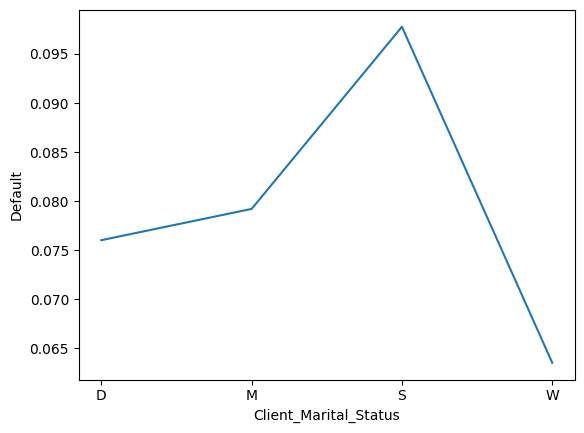

In [40]:
sns.lineplot(x = 'Client_Marital_Status', y = 'Default', data = mar_res)

<Axes: xlabel='Client_Education', ylabel='Default'>

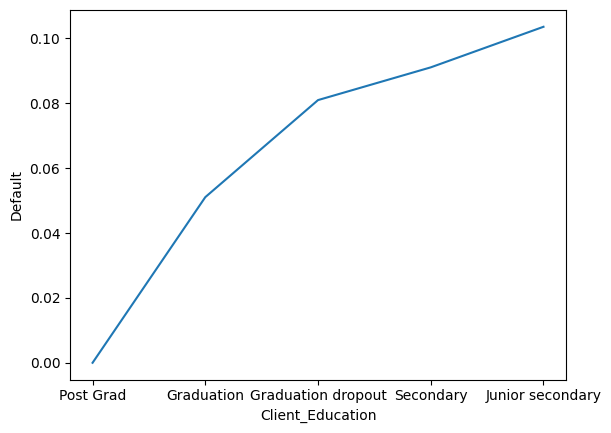

In [41]:
mar_res = X_train.groupby(['Client_Education']).agg({"ID":"count",
                                                "Default" :"mean"}).sort_values(by = 'Default').reset_index()
sns.lineplot(x = 'Client_Education', y = 'Default', data = mar_res)

<Axes: >

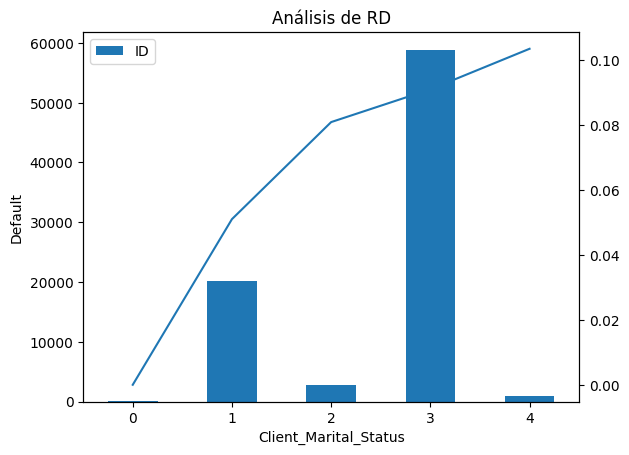

In [42]:
# Title
plt.title('Análisis de RD')
# X label
plt.xlabel('Client_Marital_Status')
# Y label
plt.ylabel('Default')


ax = mar_res['Default'].plot(secondary_y = True)
mar_res[['Client_Education','ID']].plot(kind='bar', ax=ax)


#### Encoding de variables categóricas


---

<h3>Label Encoding</h3>

El label encoding consiste en asignar un número (por lo general entero) a cada una de las categorías de la variable categórica.

<img src="https://miro.medium.com/max/772/1*QQe-4476Oy3_dI1vhb3dDg.png" alt="HTML5 Icon" style="width: 1600px; height: 1250px;">



---

<h3>One Hot Encoding</h3>

El One hot encoding es un proceso que consiste en dummizar cada catgoría de la variable en una nueva variable, de esta manera las nuevas variables se activarán dependiendo del valor que tome la variable original.

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTr11qA6j0WCbEYrfNoQ7QO_NpMIZus42BJwQ&usqp=CAU" alt="HTML5 Icon" style="width: 1600px; height: 1250px;">

---

<div style="text-align: center">Ejemplo de one hot Encoding </div>

<h3>Target Encoding</h3>

El target encoding es una técnica que consiste en inputar el promedio del target a cada uno de los valores de la variable categórica.

<img src="https://lh6.googleusercontent.com/6_KrGj2k9NvcLVfmZ6HIYruAqav4rX86YU7WOhXofDGd6-98JjUPWajo0dDqmFMXv3tN0b_LOmgYLiPMCFyIWw3b7lVrCAiSboWgJ_AJ4TqHpNWUHkgIxl0xuSF9JdSXNbWG48QS" alt="HTML5 Icon" style="width: 600px; height: 450px;">

---


In [43]:
# Reemplazar las filas NaN por una categoría específica para missings

X_train[categorical_features].fillna('missing', inplace = True)
X_train[categorical_features] = X_train[categorical_features].replace(np.nan,'missing')

X_train[categorical_features].head()

<ipython-input-43-8a7cdc08b394>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[categorical_features].fillna('missing', inplace = True)


,Accompany_Client,Client_Income_Type,Client_Education,Client_Marital_Status,Client_Gender,Loan_Contract_Type,Client_Housing_Type,Client_Occupation,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization
66289,Alone,Commercial,Secondary,M,Male,CL,Home,missing,Yes,No,missing
109009,Relative,Commercial,Secondary,M,Male,CL,Home,Laborers,Yes,Yes,Business Entity Type 2
30526,Alone,Service,Graduation,M,Male,CL,Home,missing,Yes,Yes,Self-employed
117872,Alone,Service,Secondary,M,Male,CL,Home,Core,Yes,Yes,Self-employed
90866,Alone,Service,Secondary,M,Male,CL,missing,Sales,No,Yes,Trade: type 3


<h3>One Hot Encoding</h3>

In [44]:
# One hot Encoding
from sklearn.preprocessing import OneHotEncoder
OneHotEncoder = OneHotEncoder()

In [45]:
# definiendo reglas de encoding
OneHotEncoder.fit(X_train[categorical_features])


OneHotEncoder()

In [46]:
list_dummys = []
for c in categorical_features:
  list_dummys += [c + '_dum' + str(x) for x in range(len(X_train[c].drop_duplicates()))]


In [47]:
list_dummys


['Accompany_Client_dum0',
 'Accompany_Client_dum1',
 'Accompany_Client_dum2',
 'Accompany_Client_dum3',
 'Accompany_Client_dum4',
 'Accompany_Client_dum5',
 'Accompany_Client_dum6',
 'Accompany_Client_dum7',
 'Client_Income_Type_dum0',
 'Client_Income_Type_dum1',
 'Client_Income_Type_dum2',
 'Client_Income_Type_dum3',
 'Client_Income_Type_dum4',
 'Client_Income_Type_dum5',
 'Client_Income_Type_dum6',
 'Client_Income_Type_dum7',
 'Client_Education_dum0',
 'Client_Education_dum1',
 'Client_Education_dum2',
 'Client_Education_dum3',
 'Client_Education_dum4',
 'Client_Education_dum5',
 'Client_Marital_Status_dum0',
 'Client_Marital_Status_dum1',
 'Client_Marital_Status_dum2',
 'Client_Marital_Status_dum3',
 'Client_Marital_Status_dum4',
 'Client_Gender_dum0',
 'Client_Gender_dum1',
 'Client_Gender_dum2',
 'Loan_Contract_Type_dum0',
 'Loan_Contract_Type_dum1',
 'Loan_Contract_Type_dum2',
 'Client_Housing_Type_dum0',
 'Client_Housing_Type_dum1',
 'Client_Housing_Type_dum2',
 'Client_Housing_

In [48]:
# Usando reglas de encoding

X_train[list_dummys] = OneHotEncoder.transform(X_train[categorical_features]).toarray()
X_train[categorical_features + list_dummys].head()

<ipython-input-48-b313d7a53566>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_train[list_dummys] = OneHotEncoder.transform(X_train[categorical_features]).toarray()
<ipython-input-48-b313d7a53566>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_train[list_dummys] = OneHotEncoder.transform(X_train[categorical_features]).toarray()
<ipython-input-48-b313d7a53566>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joini

,Accompany_Client,Client_Income_Type,Client_Education,Client_Marital_Status,Client_Gender,Loan_Contract_Type,Client_Housing_Type,Client_Occupation,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,...,Type_Organization_dum48,Type_Organization_dum49,Type_Organization_dum50,Type_Organization_dum51,Type_Organization_dum52,Type_Organization_dum53,Type_Organization_dum54,Type_Organization_dum55,Type_Organization_dum56,Type_Organization_dum57
66289,Alone,Commercial,Secondary,M,Male,CL,Home,missing,Yes,No,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
109009,Relative,Commercial,Secondary,M,Male,CL,Home,Laborers,Yes,Yes,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30526,Alone,Service,Graduation,M,Male,CL,Home,missing,Yes,Yes,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
117872,Alone,Service,Secondary,M,Male,CL,Home,Core,Yes,Yes,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
90866,Alone,Service,Secondary,M,Male,CL,missing,Sales,No,Yes,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
X_train[[x for x in X_train.columns.tolist() if 'Marital_Status' in x]].drop_duplicates()

,Client_Marital_Status,Client_Marital_Status_dum0,Client_Marital_Status_dum1,Client_Marital_Status_dum2,Client_Marital_Status_dum3,Client_Marital_Status_dum4
66289,M,0.0,1.0,0.0,0.0,0.0
7076,S,0.0,0.0,1.0,0.0,0.0
81616,D,1.0,0.0,0.0,0.0,0.0
114150,W,0.0,0.0,0.0,1.0,0.0
80118,missing,0.0,0.0,0.0,0.0,1.0


In [50]:
X_train.shape

(85299, 163)

<h3>Target Encoding</h3>

In [51]:
%%capture
!pip install category_encoders

In [52]:
# Target Encoding

from category_encoders import TargetEncoder
encoder = TargetEncoder()

In [53]:
# definiendo reglas de encoding

TargetEncoder = encoder.fit(X_train[categorical_features], X_train['Default'])

In [54]:
# Usando reglas de encoding

X_train[[x + '_num' for x in categorical_features]] = TargetEncoder.transform(X_train[categorical_features])
X_test[[x + '_num' for x in categorical_features]] = TargetEncoder.transform(X_test[categorical_features])


In [55]:
#Analizamos resultados

X_train[[x for x in X_train.columns.tolist() if 'Client_Gender' in x] ].drop_duplicates().head()


,Client_Gender,Client_Gender_dum0,Client_Gender_dum1,Client_Gender_dum2,Client_Gender_num
66289,Male,0.0,1.0,0.0,0.070758
7076,Female,1.0,0.0,0.0,0.100146
80118,missing,0.0,0.0,1.0,0.077497


<h3>WOE Encoding</h3>

In [56]:
# Target Encoding

from category_encoders.woe import WOEEncoder
encoder = WOEEncoder()


In [57]:
# definiendo reglas de encoding

WOEEncoder = encoder.fit(X_train[categorical_features], X_train['Default'])

In [58]:
# Usando reglas de encoding

X_train[[x + '_woe' for x in categorical_features]] = WOEEncoder.transform(X_train[categorical_features])
X_test[[x + '_woe' for x in categorical_features]] = WOEEncoder.transform(X_test[categorical_features])


In [59]:
#X_test[categorical_features].fillna('missing', inplace = True)
#X_test[categorical_features] = X_test[categorical_features].replace(np.nan,'missing')

#X_test[[x + '_woe' for x in categorical_features]] = WOEEncoder.transform(X_test[categorical_features])


In [60]:
X_train[['Client_Gender','Client_Gender_woe']].drop_duplicates().head()

,Client_Gender,Client_Gender_woe
66289,Male,-0.143422
7076,Female,0.236154
80118,missing,-0.038646


In [61]:
#Analizamos resultados

X_train[[x for x in X_train.columns.tolist() if 'Client_Gender' in x] ].drop_duplicates().head()


,Client_Gender,Client_Gender_dum0,Client_Gender_dum1,Client_Gender_dum2,Client_Gender_num,Client_Gender_woe
66289,Male,0.0,1.0,0.0,0.070758,-0.143422
7076,Female,1.0,0.0,0.0,0.100146,0.236154
80118,missing,0.0,0.0,1.0,0.077497,-0.038646


In [62]:
roc_auc_score(X_train.Default, X_train.Client_Gender_num)*2-1

0.08893367136772024

In [63]:
roc_auc_score(X_train.Default, X_train.Client_Gender_woe)*2-1

0.08893367136772024

In [64]:
roc_auc_score(X_train.Default, X_train.Client_Gender_dum0)*2-1

0.08774192299640515

In [65]:
roc_auc_score(X_train.Default, X_train.Client_Gender_dum1)*2-1

-0.08683733595014442

In [66]:
roc_auc_score(X_train.Default, X_train.Client_Gender_dum2)*2-1

-0.0009045870462606187

## 5. Tratamiento de variables numéricas




In [67]:
numeric_features

['Credit_Bureau',
 'Child_Count',
 'Application_Process_Day',
 'Score_Source_2',
 'Bike_Owned',
 'Application_Process_Hour',
 'Mobile_Tag',
 'Active_Loan',
 'codmes',
 'ID_Days',
 'Client_Family_Members',
 'Homephone_Tag',
 'Cleint_City_Rating',
 'Social_Circle_Default',
 'Car_Owned',
 'Workphone_Working',
 'Loan_Annuity',
 'Credit_Amount',
 'Employed_Days',
 'House_Own',
 'Age_Days',
 'Population_Region_Relative',
 'Score_Source_3',
 'Registration_Days',
 'Own_House_Age',
 'Phone_Change',
 'Score_Source_1',
 'Client_Income']

In [68]:
# Cargar seaborn
import seaborn as sns
sns.set(style="whitegrid", color_codes = True)
sns.set(rc={'figure.figsize':(10,6)})

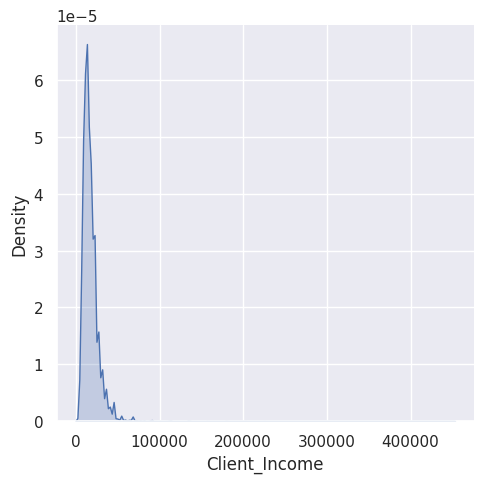

In [69]:
#sns.displot(X_train, x = 'Client_Income', bins=20)
sns.displot(X_train, x = "Client_Income", kind="kde", fill=True)

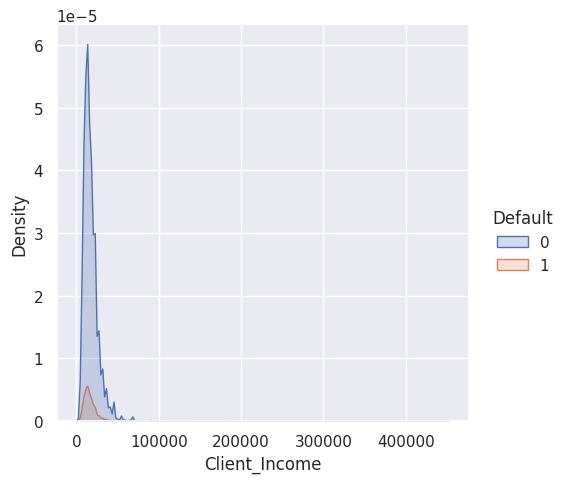

In [70]:
sns.displot(X_train, x="Client_Income", hue='Default', kind="kde", fill=True)

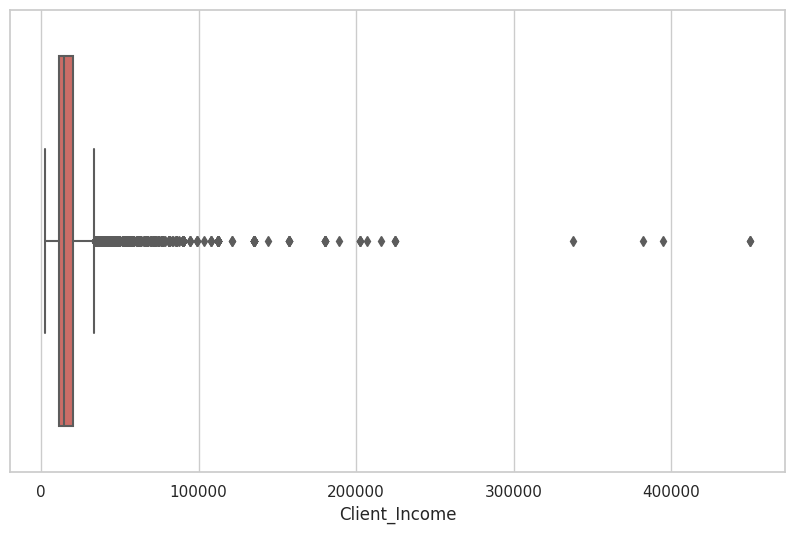

In [71]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x = "Client_Income", data = X_train, palette = 'hls')

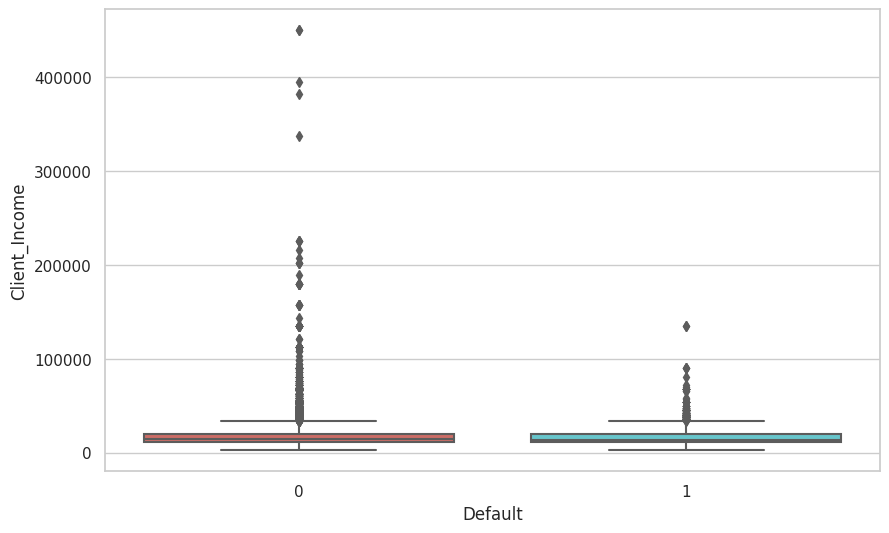

In [72]:
ax = sns.boxplot(x="Default", y="Client_Income", data=X_train, palette = 'hls')


### Tratamiento de outliers

<h3>Outliers por Rango Intercuantílico</h3>

<img src="https://miro.medium.com/max/1400/1*2c21SkzJMf3frPXPAR_gZA.png" width="500"
     height="300" >

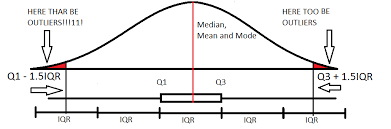

In [73]:
#Leyendo tabla resumen

univariate_II = pd.read_csv('univariate_assesment.csv').sort_values(by = 'abs_ginimax', ascending = False)
univariate_II = univariate_II.loc[univariate_II.abs_ginimax > 0.025]

univariate_II.head()

,feature,count,mean,std,min,Q1,Median,Q3,max,missing_rate,giniZero,giniNan,abs_giniZero,abs_giniNan,abs_ginimax,cv
0,Score_Source_3,66516.0,0.511120,0.194368,0.000527,0.372334,0.53707,0.667458,0.896010,0.220202,-0.225921,-0.342416,0.225921,0.342416,0.342416,0.380279
1,Score_Source_1,37130.0,0.500320,0.211204,0.014568,0.332750,0.50333,0.673347,0.945741,0.564708,-0.097251,-0.316251,0.097251,0.316251,0.316251,0.422138
2,Score_Source_2,81359.0,0.518766,0.723443,0.000005,0.390915,0.56544,0.663990,100.000000,0.046190,-0.273964,-0.303939,0.273964,0.303939,0.303939,1.394546
3,Employed_Days,82761.0,67160.180641,138977.268774,0.000000,931.000000,2211.00000,5625.000000,365243.000000,0.029754,-0.172016,-0.183437,0.172016,0.183437,0.183437,2.069340
4,Age_Days,82785.0,16030.353482,4367.969719,7676.000000,12399.000000,15736.00000,19671.000000,25201.000000,0.029473,-0.146395,-0.155875,0.146395,0.155875,0.155875,0.272481


In [74]:
# Calculando los intervalos RIC

univariate_II['ric'] = univariate_II['Q3'] - univariate_II['Q1']

univariate_II['min_ric'] = univariate_II['Q1'] - 1.5*univariate_II['ric']
univariate_II['max_ric'] = univariate_II['Q3'] + 1.5*univariate_II['ric']

univariate_II.head()

,feature,count,mean,std,min,Q1,Median,Q3,max,missing_rate,giniZero,giniNan,abs_giniZero,abs_giniNan,abs_ginimax,cv,ric,min_ric,max_ric
0,Score_Source_3,66516.0,0.511120,0.194368,0.000527,0.372334,0.53707,0.667458,0.896010,0.220202,-0.225921,-0.342416,0.225921,0.342416,0.342416,0.380279,0.295124,-0.070352,1.110144
1,Score_Source_1,37130.0,0.500320,0.211204,0.014568,0.332750,0.50333,0.673347,0.945741,0.564708,-0.097251,-0.316251,0.097251,0.316251,0.316251,0.422138,0.340597,-0.178145,1.184242
2,Score_Source_2,81359.0,0.518766,0.723443,0.000005,0.390915,0.56544,0.663990,100.000000,0.046190,-0.273964,-0.303939,0.273964,0.303939,0.303939,1.394546,0.273075,-0.018698,1.073603
3,Employed_Days,82761.0,67160.180641,138977.268774,0.000000,931.000000,2211.00000,5625.000000,365243.000000,0.029754,-0.172016,-0.183437,0.172016,0.183437,0.183437,2.069340,4694.000000,-6110.000000,12666.000000
4,Age_Days,82785.0,16030.353482,4367.969719,7676.000000,12399.000000,15736.00000,19671.000000,25201.000000,0.029473,-0.146395,-0.155875,0.146395,0.155875,0.155875,0.272481,7272.000000,1491.000000,30579.000000


In [75]:
# Tratamiento de outliers por RIC

for col in univariate_II.feature.tolist():
  desc = univariate_II.loc[univariate_II.feature == col]
  X_train[col + '_tric'] = X_train[col].apply(lambda x: desc.max_ric.values[0] if x > desc.max_ric.values[0]
                                                   else desc.min_ric.values[0] if x < desc.min_ric.values[0]
                                                   else x)

X_train.head()

,Credit_Bureau,Child_Count,Application_Process_Day,Score_Source_2,Bike_Owned,Loan_Contract_Type,Application_Process_Hour,Client_Contact_Work_Tag,Mobile_Tag,Active_Loan,...,Registration_Days_tric,Population_Region_Relative_tric,Application_Process_Hour_tric,Car_Owned_tric,Workphone_Working_tric,Credit_Amount_tric,Client_Income_tric,Credit_Bureau_tric,Child_Count_tric,Homephone_Tag_tric
66289,3.0,0.0,1.0,0.673780,1.0,CL,12.0,No,1,1.0,...,90.0,0.028663,12.0,0.0,0,161662.50,14400.0,3.0,0.0,0.0
109009,NaN,1.0,5.0,0.638836,1.0,CL,18.0,Yes,1,1.0,...,2684.0,0.030755,18.0,0.0,0,15282.00,6750.0,NaN,1.0,0.0
30526,2.0,1.0,4.0,0.679607,1.0,CL,15.0,Yes,1,0.0,...,5614.0,0.035792,15.0,0.0,1,49752.00,NaN,2.0,1.0,0.0
117872,5.0,0.0,4.0,0.475857,0.0,CL,12.0,Yes,1,1.0,...,506.0,0.014520,12.0,1.0,0,112500.00,11250.0,5.0,0.0,0.0
90866,0.0,0.0,0.0,0.434370,0.0,CL,11.0,Yes,1,1.0,...,4813.0,0.008866,11.0,0.0,0,122790.15,10800.0,0.0,0.0,0.0


In [76]:
# Tratamiento de outliers por RIC

for col in univariate_II.feature.tolist():
  desc = univariate_II.loc[univariate_II.feature == col]
  X_test[col + '_tric'] = X_test[col].apply(lambda x: desc.max_ric.values[0] if x > desc.max_ric.values[0]
                                                   else desc.min_ric.values[0] if x < desc.min_ric.values[0]
                                                   else x)

X_test.head()

,Credit_Bureau,Child_Count,Application_Process_Day,Score_Source_2,Bike_Owned,Loan_Contract_Type,Application_Process_Hour,Client_Contact_Work_Tag,Mobile_Tag,Active_Loan,...,Registration_Days_tric,Population_Region_Relative_tric,Application_Process_Hour_tric,Car_Owned_tric,Workphone_Working_tric,Credit_Amount_tric,Client_Income_tric,Credit_Bureau_tric,Child_Count_tric,Homephone_Tag_tric
112057,4.0,1.0,6.0,0.600485,0.0,CL,13.0,Yes,1,0.0,...,5562.0,0.031329,13.0,0.0,0,15282.0,9000.0,4.0,1.0,0.0
120486,3.0,0.0,3.0,0.279235,0.0,CL,17.0,Yes,1,0.0,...,9175.0,0.007330,17.0,0.0,0,4797.0,4500.0,3.0,0.0,0.0
52578,1.0,1.0,2.0,0.010081,NaN,CL,10.0,Yes,1,0.0,...,3879.0,0.019101,10.0,1.0,0,92725.2,20250.0,1.0,1.0,0.0
82223,0.0,0.0,0.0,0.239969,0.0,CL,15.0,Yes,1,0.0,...,937.0,0.025164,15.0,0.0,0,90000.0,11250.0,0.0,0.0,0.0
8416,2.0,0.0,4.0,0.597255,0.0,CL,8.0,Yes,1,0.0,...,2622.0,0.018801,8.0,0.0,0,13950.0,15750.0,2.0,0.0,0.0


Revisemos los resultados

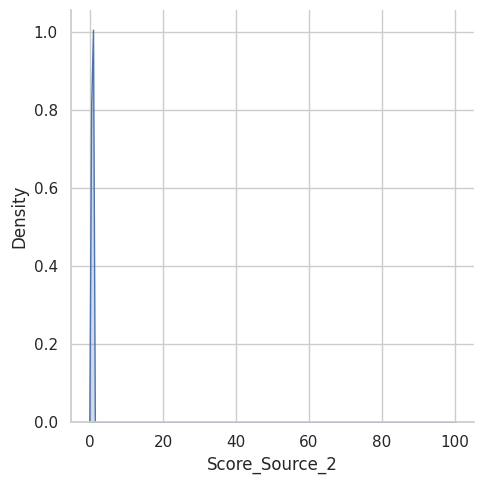

In [77]:
sns.displot(X_train, x = "Score_Source_2", kind="kde", fill=True)

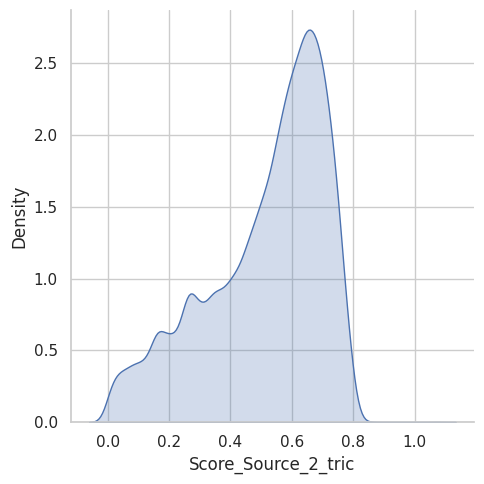

In [78]:
sns.displot(X_train, x = "Score_Source_2_tric", kind="kde", fill=True)

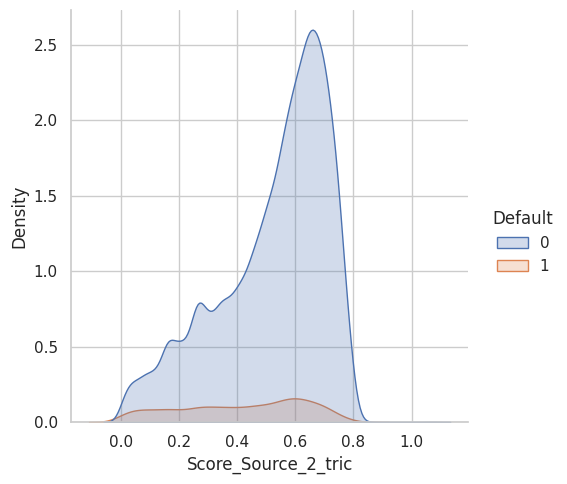

In [79]:
sns.displot(X_train, x="Score_Source_2_tric", hue='Default', kind="kde", fill=True)

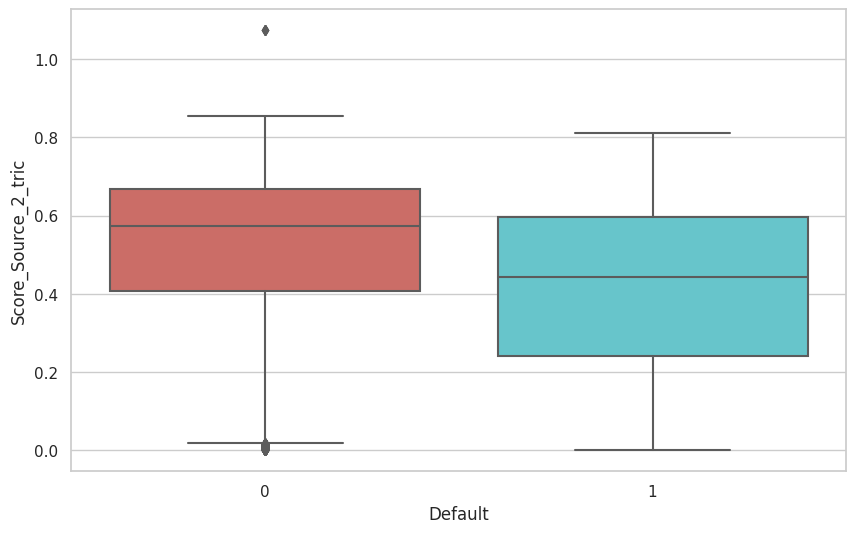

In [80]:
ax = sns.boxplot(x="Default", y="Score_Source_2_tric", data=X_train, palette = 'hls')

<h3>Outliers por Z-score</h3>



<img src="https://editor.analyticsvidhya.com/uploads/440971.png" width="500"
     height="300" >

In [81]:
univariate_II.head()

,feature,count,mean,std,min,Q1,Median,Q3,max,missing_rate,giniZero,giniNan,abs_giniZero,abs_giniNan,abs_ginimax,cv,ric,min_ric,max_ric
0,Score_Source_3,66516.0,0.511120,0.194368,0.000527,0.372334,0.53707,0.667458,0.896010,0.220202,-0.225921,-0.342416,0.225921,0.342416,0.342416,0.380279,0.295124,-0.070352,1.110144
1,Score_Source_1,37130.0,0.500320,0.211204,0.014568,0.332750,0.50333,0.673347,0.945741,0.564708,-0.097251,-0.316251,0.097251,0.316251,0.316251,0.422138,0.340597,-0.178145,1.184242
2,Score_Source_2,81359.0,0.518766,0.723443,0.000005,0.390915,0.56544,0.663990,100.000000,0.046190,-0.273964,-0.303939,0.273964,0.303939,0.303939,1.394546,0.273075,-0.018698,1.073603
3,Employed_Days,82761.0,67160.180641,138977.268774,0.000000,931.000000,2211.00000,5625.000000,365243.000000,0.029754,-0.172016,-0.183437,0.172016,0.183437,0.183437,2.069340,4694.000000,-6110.000000,12666.000000
4,Age_Days,82785.0,16030.353482,4367.969719,7676.000000,12399.000000,15736.00000,19671.000000,25201.000000,0.029473,-0.146395,-0.155875,0.146395,0.155875,0.155875,0.272481,7272.000000,1491.000000,30579.000000


In [82]:
# Calculando los intervalos Z-score

univariate_II['min_zscore'] = univariate_II['mean'] - 3*univariate_II['std']
univariate_II['max_zscore'] = univariate_II['mean'] + 3*univariate_II['std']

univariate_II.head()

,feature,count,mean,std,min,Q1,Median,Q3,max,missing_rate,...,giniNan,abs_giniZero,abs_giniNan,abs_ginimax,cv,ric,min_ric,max_ric,min_zscore,max_zscore
0,Score_Source_3,66516.0,0.511120,0.194368,0.000527,0.372334,0.53707,0.667458,0.896010,0.220202,...,-0.342416,0.225921,0.342416,0.342416,0.380279,0.295124,-0.070352,1.110144,-0.071985,1.094224
1,Score_Source_1,37130.0,0.500320,0.211204,0.014568,0.332750,0.50333,0.673347,0.945741,0.564708,...,-0.316251,0.097251,0.316251,0.316251,0.422138,0.340597,-0.178145,1.184242,-0.133293,1.133932
2,Score_Source_2,81359.0,0.518766,0.723443,0.000005,0.390915,0.56544,0.663990,100.000000,0.046190,...,-0.303939,0.273964,0.303939,0.303939,1.394546,0.273075,-0.018698,1.073603,-1.651562,2.689093
3,Employed_Days,82761.0,67160.180641,138977.268774,0.000000,931.000000,2211.00000,5625.000000,365243.000000,0.029754,...,-0.183437,0.172016,0.183437,0.183437,2.069340,4694.000000,-6110.000000,12666.000000,-349771.625681,484091.986962
4,Age_Days,82785.0,16030.353482,4367.969719,7676.000000,12399.000000,15736.00000,19671.000000,25201.000000,0.029473,...,-0.155875,0.146395,0.155875,0.155875,0.272481,7272.000000,1491.000000,30579.000000,2926.444325,29134.262639


In [83]:
# Tratamiento de outliers por Z-score

for col in univariate_II.feature.tolist():
  desc = univariate_II.loc[univariate_II.feature == col]
  X_train[col + '_tzscore'] = X_train[col].apply(lambda x: desc.max_zscore.values[0] if x > desc.max_zscore.values[0]
                                                   else desc.min_zscore.values[0] if x < desc.min_zscore.values[0]
                                                   else x)

X_train.head()

,Credit_Bureau,Child_Count,Application_Process_Day,Score_Source_2,Bike_Owned,Loan_Contract_Type,Application_Process_Hour,Client_Contact_Work_Tag,Mobile_Tag,Active_Loan,...,Registration_Days_tzscore,Population_Region_Relative_tzscore,Application_Process_Hour_tzscore,Car_Owned_tzscore,Workphone_Working_tzscore,Credit_Amount_tzscore,Client_Income_tzscore,Credit_Bureau_tzscore,Child_Count_tzscore,Homephone_Tag_tzscore
66289,3.0,0.0,1.0,0.673780,1.0,CL,12.0,No,1,1.0,...,90.0,0.028663,12.0,0.0,0,180000.00,14400.0,3.0,0.0,0
109009,NaN,1.0,5.0,0.638836,1.0,CL,18.0,Yes,1,1.0,...,2684.0,0.030755,18.0,0.0,0,15282.00,6750.0,NaN,1.0,0
30526,2.0,1.0,4.0,0.679607,1.0,CL,15.0,Yes,1,0.0,...,5614.0,0.035792,15.0,0.0,1,49752.00,NaN,2.0,1.0,0
117872,5.0,0.0,4.0,0.475857,0.0,CL,12.0,Yes,1,1.0,...,506.0,0.014520,12.0,1.0,0,112500.00,11250.0,5.0,0.0,0
90866,0.0,0.0,0.0,0.434370,0.0,CL,11.0,Yes,1,1.0,...,4813.0,0.008866,11.0,0.0,0,122790.15,10800.0,0.0,0.0,0


In [84]:
# Tratamiento de outliers por Z-score

for col in univariate_II.feature.tolist():
  desc = univariate_II.loc[univariate_II.feature == col]
  X_test[col + '_tzscore'] = X_test[col].apply(lambda x: desc.max_zscore.values[0] if x > desc.max_zscore.values[0]
                                                   else desc.min_zscore.values[0] if x < desc.min_zscore.values[0]
                                                   else x)

X_test.head()

,Credit_Bureau,Child_Count,Application_Process_Day,Score_Source_2,Bike_Owned,Loan_Contract_Type,Application_Process_Hour,Client_Contact_Work_Tag,Mobile_Tag,Active_Loan,...,Registration_Days_tzscore,Population_Region_Relative_tzscore,Application_Process_Hour_tzscore,Car_Owned_tzscore,Workphone_Working_tzscore,Credit_Amount_tzscore,Client_Income_tzscore,Credit_Bureau_tzscore,Child_Count_tzscore,Homephone_Tag_tzscore
112057,4.0,1.0,6.0,0.600485,0.0,CL,13.0,Yes,1,0.0,...,5562.0,0.031329,13.0,0.0,0,15282.0,9000.0,4.0,1.0,0
120486,3.0,0.0,3.0,0.279235,0.0,CL,17.0,Yes,1,0.0,...,9175.0,0.007330,17.0,0.0,0,4797.0,4500.0,3.0,0.0,0
52578,1.0,1.0,2.0,0.010081,NaN,CL,10.0,Yes,1,0.0,...,3879.0,0.019101,10.0,1.0,0,92725.2,20250.0,1.0,1.0,0
82223,0.0,0.0,0.0,0.239969,0.0,CL,15.0,Yes,1,0.0,...,937.0,0.025164,15.0,0.0,0,90000.0,11250.0,0.0,0.0,1
8416,2.0,0.0,4.0,0.597255,0.0,CL,8.0,Yes,1,0.0,...,2622.0,0.018801,8.0,0.0,0,13950.0,15750.0,2.0,0.0,0


Revisemos los resultados

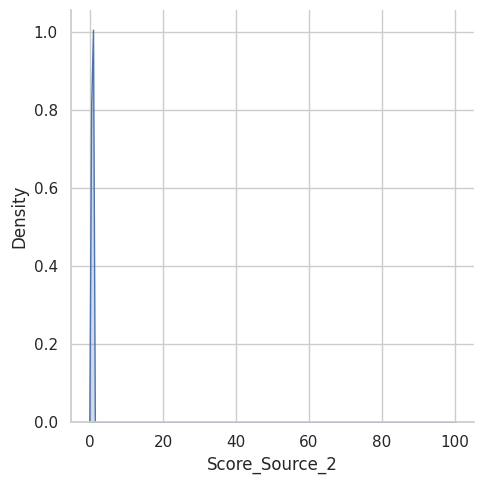

In [85]:
sns.displot(X_train, x = "Score_Source_2", kind="kde", fill=True)

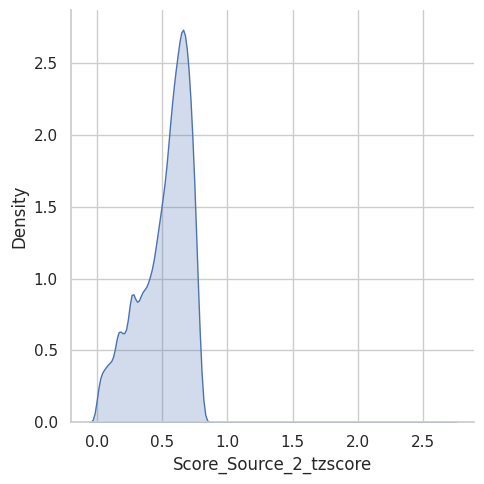

In [86]:
sns.displot(X_train, x = "Score_Source_2_tzscore", kind="kde", fill=True)

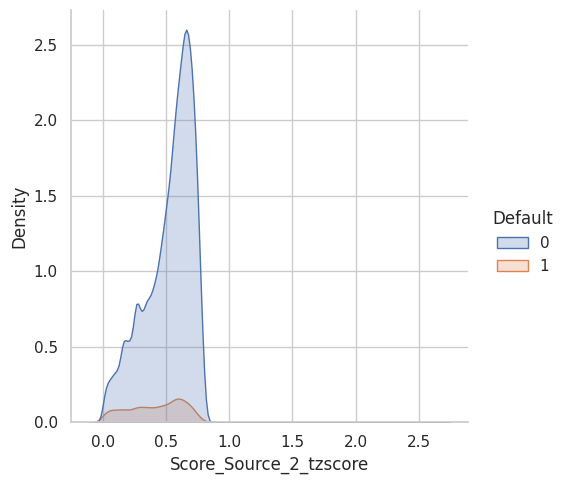

In [87]:
sns.displot(X_train, x="Score_Source_2_tzscore", hue='Default', kind="kde", fill=True)

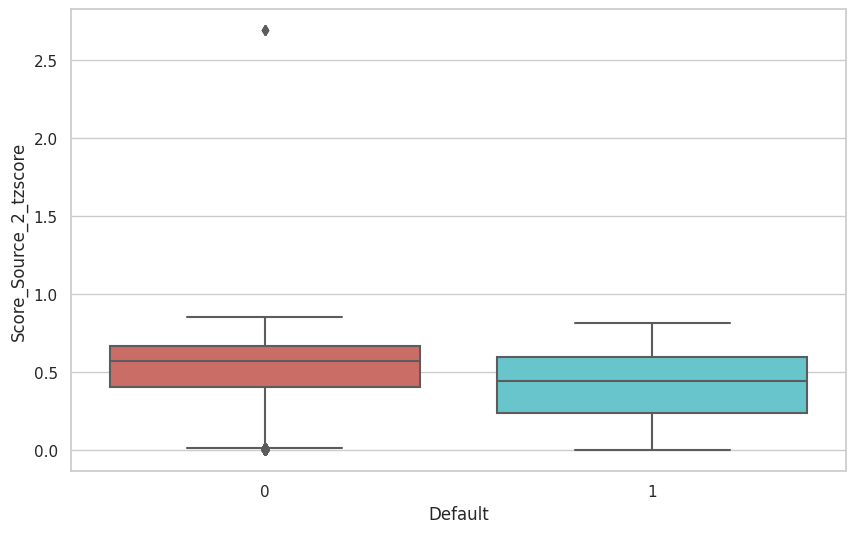

In [88]:
ax = sns.boxplot(x="Default", y="Score_Source_2_tzscore", data=X_train, palette = 'hls')

In [89]:
#Calculando el gini univariado de todas las variables

features_outtreat_zscore = [x  + '_tzscore' for x in univariate_II.feature.tolist()]
features_outtreat_tric = [x  + '_tric' for x in univariate_II.feature.tolist()]


In [90]:
#Calculando el gini univariado de todas las variables

ginisZeroZscore = [roc_auc_score(y_test, X_test[col].fillna(0))*2-1 for col in features_outtreat_zscore]
ginisZeroTric = [roc_auc_score(y_test, X_test[col].fillna(0))*2-1 for col in features_outtreat_tric]


In [91]:
temp = X_test.copy()
temp['y'] = y_test

ginisNanZscore = [roc_auc_score(temp[['y', col]].dropna().y, temp[['y', col]].dropna()[col])*2-1 for col in features_outtreat_zscore]
ginisNanTric = [roc_auc_score(temp[['y', col]].dropna().y, temp[['y', col]].dropna()[col])*2-1 for col in features_outtreat_tric]


In [92]:
res_ginis2 = pd.DataFrame({'feature' : univariate_II.feature.tolist(),
                          'giniZeroZscore' : ginisZeroZscore,
                          'giniZeroTric' : ginisZeroTric,
                          'giniNanZscore' : ginisNanZscore,
                          'giniNanTric'  : ginisNanTric})

In [93]:
univariate_III = pd.merge(univariate_II, res_ginis2, on = 'feature', how='left')
univariate_III[['feature'] + [x for x in univariate_III.columns.tolist() if 'gini' in x]].head(10)

,feature,giniZero,giniNan,abs_giniZero,abs_giniNan,abs_ginimax,giniZeroZscore,giniZeroTric,giniNanZscore,giniNanTric
0,Score_Source_3,-0.225921,-0.342416,0.225921,0.342416,0.342416,-0.237732,-0.237732,-0.362563,-0.362563
1,Score_Source_1,-0.097251,-0.316251,0.097251,0.316251,0.316251,-0.093218,-0.093218,-0.313866,-0.313866
2,Score_Source_2,-0.273964,-0.303939,0.273964,0.303939,0.303939,-0.270448,-0.270448,-0.298284,-0.298284
3,Employed_Days,-0.172016,-0.183437,0.172016,0.183437,0.183437,-0.161346,-0.161680,-0.175867,-0.176221
4,Age_Days,-0.146395,-0.155875,0.146395,0.155875,0.155875,-0.149218,-0.149218,-0.158008,-0.158008
5,Own_House_Age,-0.028796,0.130995,0.028796,0.130995,0.130995,-0.021608,-0.021600,0.090004,0.090075
6,ID_Days,-0.110733,-0.122605,0.110733,0.122605,0.122605,-0.096821,-0.096821,-0.106953,-0.106953
7,Phone_Change,-0.113137,-0.116412,0.113137,0.116412,0.116412,-0.105750,-0.105750,-0.110694,-0.110694
8,Social_Circle_Default,-0.097401,-0.083640,0.097401,0.083640,0.097401,-0.086681,-0.086622,-0.118627,-0.118356
9,Cleint_City_Rating,0.090308,0.094014,0.090308,0.094014,0.094014,0.093370,-0.001091,0.098512,0.000000


### Transformación de variables numéricas

<h3> Tratamiendo por WOE </h3>

In [94]:
f_numeric_features = [x for x in X_train.columns.tolist() if '_tric' in x]

In [95]:
f_numeric_features

['Score_Source_3_tric',
 'Score_Source_1_tric',
 'Score_Source_2_tric',
 'Employed_Days_tric',
 'Age_Days_tric',
 'Own_House_Age_tric',
 'ID_Days_tric',
 'Phone_Change_tric',
 'Social_Circle_Default_tric',
 'Cleint_City_Rating_tric',
 'Registration_Days_tric',
 'Population_Region_Relative_tric',
 'Application_Process_Hour_tric',
 'Car_Owned_tric',
 'Workphone_Working_tric',
 'Credit_Amount_tric',
 'Client_Income_tric',
 'Credit_Bureau_tric',
 'Child_Count_tric',
 'Homephone_Tag_tric']

In [96]:
X_train.Score_Source_3_tric.mean()

0.5111198154771485

In [97]:
X_train.Score_Source_3_tric.fillna(X_train.Score_Source_3_tric.mean())

66289     0.324891
109009    0.511120
30526     0.286652
117872    0.344155
90866     0.239226
            ...   
7611      0.382502
9256      0.511120
8612      0.413597
4291      0.511120
16809     0.266457
Name: Score_Source_3_tric, Length: 85299, dtype: float64

In [98]:
# Tratamiento de missings

from sklearn.impute import SimpleImputer

imp_mean = SimpleImputer(missing_values = np.nan,
                         strategy = 'median')

imp_mean = imp_mean.fit(X_train[f_numeric_features])


In [99]:

X_train[[x + '_imp' for x in f_numeric_features]] = imp_mean.transform(X_train[f_numeric_features])
X_test[[x + '_imp' for x in f_numeric_features]] = imp_mean.transform(X_test[f_numeric_features])


In [100]:
X_test[[x + '_imp' for x in f_numeric_features]].isnull().sum()

Score_Source_3_tric_imp                0
Score_Source_1_tric_imp                0
Score_Source_2_tric_imp                0
Employed_Days_tric_imp                 0
Age_Days_tric_imp                      0
Own_House_Age_tric_imp                 0
ID_Days_tric_imp                       0
Phone_Change_tric_imp                  0
Social_Circle_Default_tric_imp         0
Cleint_City_Rating_tric_imp            0
Registration_Days_tric_imp             0
Population_Region_Relative_tric_imp    0
Application_Process_Hour_tric_imp      0
Car_Owned_tric_imp                     0
Workphone_Working_tric_imp             0
Credit_Amount_tric_imp                 0
Client_Income_tric_imp                 0
Credit_Bureau_tric_imp                 0
Child_Count_tric_imp                   0
Homephone_Tag_tric_imp                 0
dtype: int64

Paso 1: Discretizar variables numéricas

In [101]:
# Discretizar variables

from sklearn.preprocessing import KBinsDiscretizer

discretizer = KBinsDiscretizer(n_bins = 20,
                               encode = 'ordinal',
                               strategy = "uniform").fit(X_train[[x + '_imp' for x in f_numeric_features]])


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:245: UserWarning: Feature 9 is constant and will be replaced with 0.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:245: UserWarning: Feature 19 is constant and will be replaced with 0.
  warnings.warn(


In [102]:
# Creando variables discretizadas

X_train[[x + '_discret' for x in f_numeric_features]] = discretizer.transform(X_train[[x + '_imp' for x in f_numeric_features]])
X_test[[x + '_discret' for x in f_numeric_features]] = discretizer.transform(X_test[[x + '_imp' for x in f_numeric_features]])

for col in [x + '_discret' for x in f_numeric_features]:
  X_train[col] = X_train[col].astype('category')
  X_test[col] = X_test[col].astype('category')


In [103]:
X_train[[x + '_discret' for x in f_numeric_features]].head()

,Score_Source_3_tric_discret,Score_Source_1_tric_discret,Score_Source_2_tric_discret,Employed_Days_tric_discret,Age_Days_tric_discret,Own_House_Age_tric_discret,ID_Days_tric_discret,Phone_Change_tric_discret,Social_Circle_Default_tric_discret,Cleint_City_Rating_tric_discret,Registration_Days_tric_discret,Population_Region_Relative_tric_discret,Application_Process_Hour_tric_discret,Car_Owned_tric_discret,Workphone_Working_tric_discret,Credit_Amount_tric_discret,Client_Income_tric_discret,Credit_Bureau_tric_discret,Child_Count_tric_discret,Homephone_Tag_tric_discret
66289,7.0,10.0,12.0,1.0,15.0,6.0,13.0,12.0,6.0,0.0,0.0,10.0,10.0,0.0,0.0,19.0,7.0,8.0,0.0,0.0
109009,11.0,9.0,11.0,5.0,3.0,6.0,0.0,11.0,8.0,0.0,3.0,10.0,17.0,0.0,0.0,1.0,2.0,2.0,8.0,0.0
30526,6.0,11.0,12.0,5.0,4.0,6.0,10.0,14.0,2.0,0.0,7.0,12.0,13.0,0.0,19.0,5.0,7.0,5.0,8.0,0.0
117872,7.0,10.0,8.0,2.0,11.0,8.0,2.0,3.0,6.0,0.0,0.0,4.0,10.0,19.0,0.0,13.0,5.0,13.0,0.0,0.0
90866,5.0,10.0,8.0,0.0,5.0,6.0,12.0,2.0,1.0,0.0,6.0,2.0,8.0,0.0,0.0,15.0,5.0,0.0,0.0,0.0


Paso 2: Tratamiento por WOE encoding

In [104]:
# WOE Encoding

from category_encoders.woe import WOEEncoder
encoder2 = WOEEncoder()


In [105]:
# definiendo reglas de encoding

WOEEncoder2 = encoder2.fit(X_train[[x + '_discret' for x in f_numeric_features]], X_train['Default'])


In [106]:
# Usando reglas de encoding

X_train[[x + '_disc_woe' for x in f_numeric_features]] = WOEEncoder2.transform(X_train[[x + '_discret' for x in f_numeric_features]])
X_test[[x + '_disc_woe' for x in f_numeric_features]] = WOEEncoder2.transform(X_test[[x + '_discret' for x in f_numeric_features]])


In [107]:
X_train[[x + '_discret' for x in f_numeric_features]].head()

,Score_Source_3_tric_discret,Score_Source_1_tric_discret,Score_Source_2_tric_discret,Employed_Days_tric_discret,Age_Days_tric_discret,Own_House_Age_tric_discret,ID_Days_tric_discret,Phone_Change_tric_discret,Social_Circle_Default_tric_discret,Cleint_City_Rating_tric_discret,Registration_Days_tric_discret,Population_Region_Relative_tric_discret,Application_Process_Hour_tric_discret,Car_Owned_tric_discret,Workphone_Working_tric_discret,Credit_Amount_tric_discret,Client_Income_tric_discret,Credit_Bureau_tric_discret,Child_Count_tric_discret,Homephone_Tag_tric_discret
66289,7.0,10.0,12.0,1.0,15.0,6.0,13.0,12.0,6.0,0.0,0.0,10.0,10.0,0.0,0.0,19.0,7.0,8.0,0.0,0.0
109009,11.0,9.0,11.0,5.0,3.0,6.0,0.0,11.0,8.0,0.0,3.0,10.0,17.0,0.0,0.0,1.0,2.0,2.0,8.0,0.0
30526,6.0,11.0,12.0,5.0,4.0,6.0,10.0,14.0,2.0,0.0,7.0,12.0,13.0,0.0,19.0,5.0,7.0,5.0,8.0,0.0
117872,7.0,10.0,8.0,2.0,11.0,8.0,2.0,3.0,6.0,0.0,0.0,4.0,10.0,19.0,0.0,13.0,5.0,13.0,0.0,0.0
90866,5.0,10.0,8.0,0.0,5.0,6.0,12.0,2.0,1.0,0.0,6.0,2.0,8.0,0.0,0.0,15.0,5.0,0.0,0.0,0.0


In [108]:
X_train[[x + '_disc_woe' for x in f_numeric_features]].head()

,Score_Source_3_tric_disc_woe,Score_Source_1_tric_disc_woe,Score_Source_2_tric_disc_woe,Employed_Days_tric_disc_woe,Age_Days_tric_disc_woe,Own_House_Age_tric_disc_woe,ID_Days_tric_disc_woe,Phone_Change_tric_disc_woe,Social_Circle_Default_tric_disc_woe,Cleint_City_Rating_tric_disc_woe,Registration_Days_tric_disc_woe,Population_Region_Relative_tric_disc_woe,Application_Process_Hour_tric_disc_woe,Car_Owned_tric_disc_woe,Workphone_Working_tric_disc_woe,Credit_Amount_tric_disc_woe,Client_Income_tric_disc_woe,Credit_Bureau_tric_disc_woe,Child_Count_tric_disc_woe,Homephone_Tag_tric_disc_woe
66289,0.195489,0.059424,-0.569151,0.336520,-0.468816,0.057793,-0.396840,-0.457026,0.120077,-0.000132,0.186592,-0.001364,0.008710,0.062780,0.057792,-0.742670,0.011403,-0.082755,-0.045707,-0.000132
109009,0.033595,-0.260324,-0.253878,-0.359027,0.269191,0.057793,0.338740,-0.330251,-0.278767,-0.000132,0.069835,-0.001364,-0.145132,0.062780,0.057792,-0.105204,-0.010902,0.049571,0.098806,-0.000132
30526,0.502484,-0.332775,-0.569151,-0.359027,0.304633,0.057793,0.027292,-0.446642,0.169682,-0.000132,0.074768,-0.125782,-0.029317,0.062780,-0.161328,0.212846,0.011403,0.012045,0.098806,-0.000132
117872,0.195489,0.059424,0.098138,0.158568,-0.152552,-0.029992,0.254835,0.113940,0.120077,-0.000132,0.186592,0.035066,0.008710,-0.136078,0.057792,-0.291194,0.084449,0.041182,-0.045707,-0.000132
90866,0.717012,0.059424,0.098138,0.362548,0.318543,0.057793,-0.296683,0.162988,0.071722,-0.000132,0.088430,0.128760,-0.033646,0.062780,0.057792,-0.147444,0.084449,-0.109000,-0.045707,-0.000132


<ipython-input-109-ecd55ac19e59>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=X_train, x="Score_Source_3_tric", y="Score_Source_3_tric_disc_woe", palette = 'hls')


<Axes: xlabel='Score_Source_3_tric', ylabel='Score_Source_3_tric_disc_woe'>

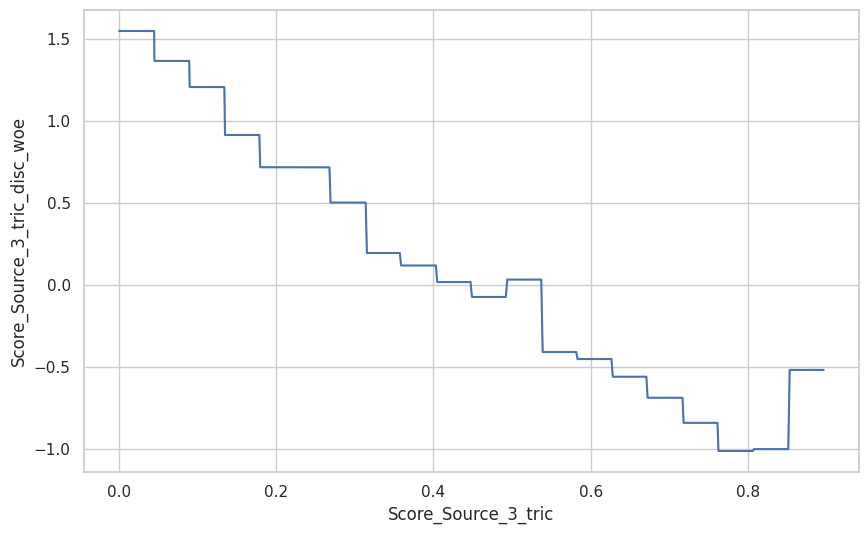

In [109]:
# Ratio del evento por tramo de la variable numérica
sns.lineplot(data=X_train, x="Score_Source_3_tric", y="Score_Source_3_tric_disc_woe", palette = 'hls')

<ipython-input-110-08c56ad06f3c>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=X_train, x="Client_Income_tric", y="Client_Income_tric_disc_woe", palette = 'hls')


<Axes: xlabel='Client_Income_tric', ylabel='Client_Income_tric_disc_woe'>

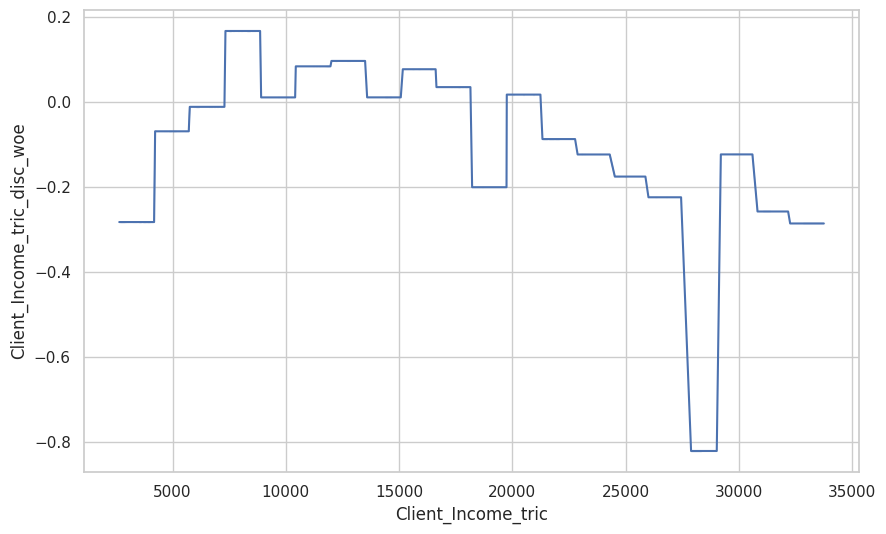

In [110]:
sns.lineplot(data=X_train, x="Client_Income_tric", y="Client_Income_tric_disc_woe", palette = 'hls')

<ipython-input-111-6d10b6f23ca6>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=X_train, x="Age_Days_tric_discret", y="Age_Days_tric_disc_woe", palette = 'hls')


<Axes: xlabel='Age_Days_tric_discret', ylabel='Age_Days_tric_disc_woe'>

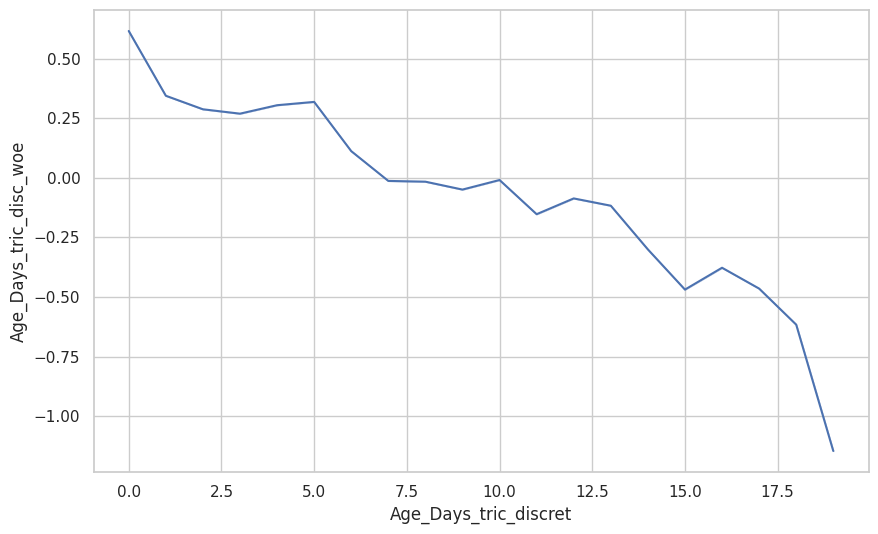

In [111]:
sns.lineplot(data=X_train, x="Age_Days_tric_discret", y="Age_Days_tric_disc_woe", palette = 'hls')

<ipython-input-112-0ae38cf6530f>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=X_train, x="Child_Count_tric_discret", y="Child_Count_tric_disc_woe", palette = 'hls')


<Axes: xlabel='Child_Count_tric_discret', ylabel='Child_Count_tric_disc_woe'>

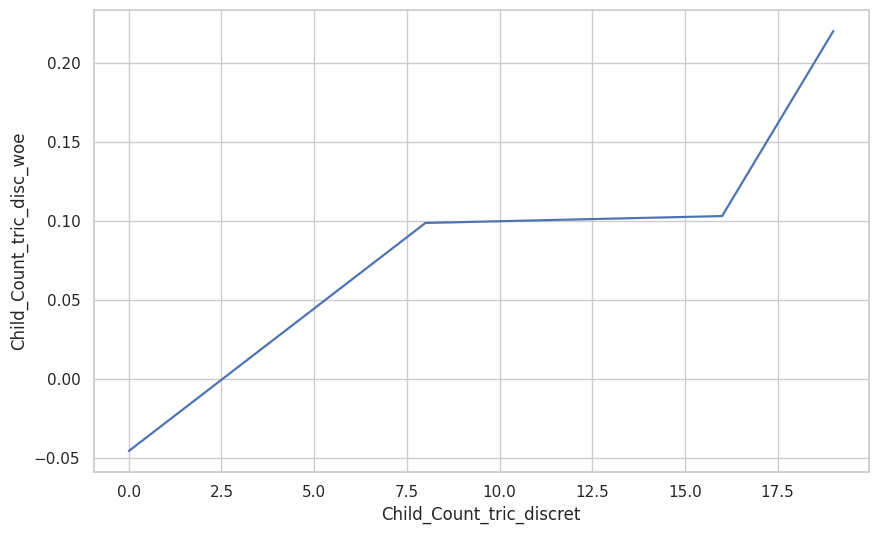

In [112]:
sns.lineplot(data=X_train, x="Child_Count_tric_discret", y="Child_Count_tric_disc_woe", palette = 'hls')

<ipython-input-113-40a89db62ee5>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=X_train, x="Credit_Amount_tric_discret", y="Credit_Amount_tric_disc_woe", palette = 'hls')


<Axes: xlabel='Credit_Amount_tric_discret', ylabel='Credit_Amount_tric_disc_woe'>

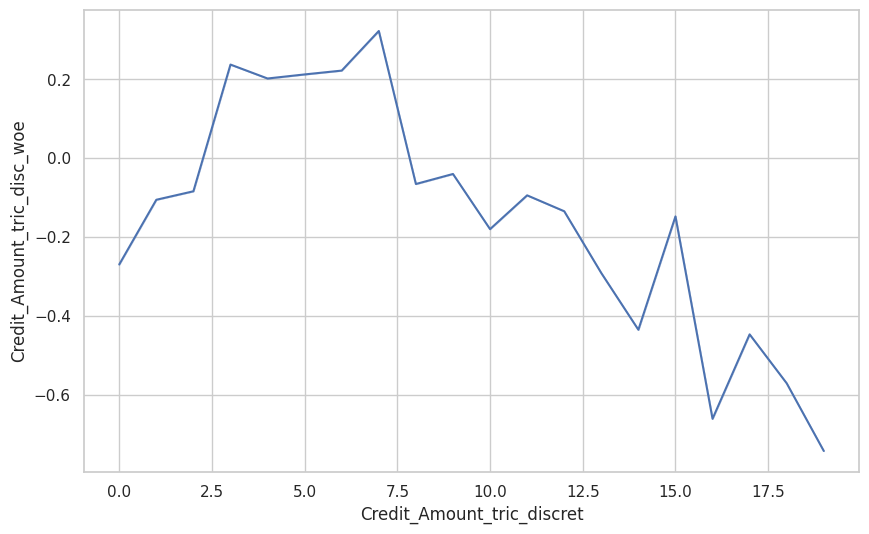

In [113]:
sns.lineplot(data=X_train, x="Credit_Amount_tric_discret", y="Credit_Amount_tric_disc_woe", palette = 'hls')

<h3> Tratamiendo por transformaciones </h3>

In [114]:
f_numeric_features = [x for x in X_train.columns.tolist() if '_tric' in x[-5:]]
f_numeric_features

['Score_Source_3_tric',
 'Score_Source_1_tric',
 'Score_Source_2_tric',
 'Employed_Days_tric',
 'Age_Days_tric',
 'Own_House_Age_tric',
 'ID_Days_tric',
 'Phone_Change_tric',
 'Social_Circle_Default_tric',
 'Cleint_City_Rating_tric',
 'Registration_Days_tric',
 'Population_Region_Relative_tric',
 'Application_Process_Hour_tric',
 'Car_Owned_tric',
 'Workphone_Working_tric',
 'Credit_Amount_tric',
 'Client_Income_tric',
 'Credit_Bureau_tric',
 'Child_Count_tric',
 'Homephone_Tag_tric']

In [115]:
# Tratamiento de missings

from sklearn.impute import SimpleImputer

imp_mean = SimpleImputer(missing_values = np.nan, strategy='median')
imp_mean = imp_mean.fit(X_train[f_numeric_features])


In [116]:

X_train[[x + '_imp' for x in f_numeric_features]] = imp_mean.transform(X_train[f_numeric_features])
X_test[[x + '_imp' for x in f_numeric_features]] = imp_mean.transform(X_test[f_numeric_features])


In [ ]:
%%capture
# Discretizar variables
from sklearn.preprocessing import KBinsDiscretizer

discretizer2 = KBinsDiscretizer(n_bins = 100,
                                encode = 'ordinal',
                                strategy = "quantile").fit(X_train[[x + '_imp' for x in f_numeric_features]])


In [118]:
# Creando variables discretizadas

X_train[[x + '_discret2' for x in f_numeric_features]] = discretizer2.transform(X_train[[x + '_imp' for x in f_numeric_features]])
X_test[[x + '_discret2' for x in f_numeric_features]] = discretizer2.transform(X_test[[x + '_imp' for x in f_numeric_features]])

for col in [x + '_discret2' for x in f_numeric_features]:
  X_train[col] = X_train[col].astype('category')
  X_test[col] = X_test[col].astype('category')


In [119]:
# WOE Encoding

from category_encoders.woe import WOEEncoder
encoder3 = WOEEncoder()


In [120]:
# definiendo reglas de encoding

WOEEncoder3 = encoder3.fit(X_train[[x + '_discret2' for x in f_numeric_features]], X_train['Default'])


In [121]:
# Usando reglas de encoding

X_train[[x + '_disc_woe2' for x in f_numeric_features]] = WOEEncoder3.transform(X_train[[x + '_discret2' for x in f_numeric_features]])
X_test[[x + '_disc_woe2' for x in f_numeric_features]] = WOEEncoder3.transform(X_test[[x + '_discret2' for x in f_numeric_features]])


In [ ]:
X_train[[x + '_disc_woe2' for x in f_numeric_features]]

<ipython-input-123-8be88b24f1f0>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=X_train, x="Score_Source_3_tric", y="Score_Source_3_tric_disc_woe2", palette = 'hls')


<Axes: xlabel='Score_Source_3_tric', ylabel='Score_Source_3_tric_disc_woe2'>

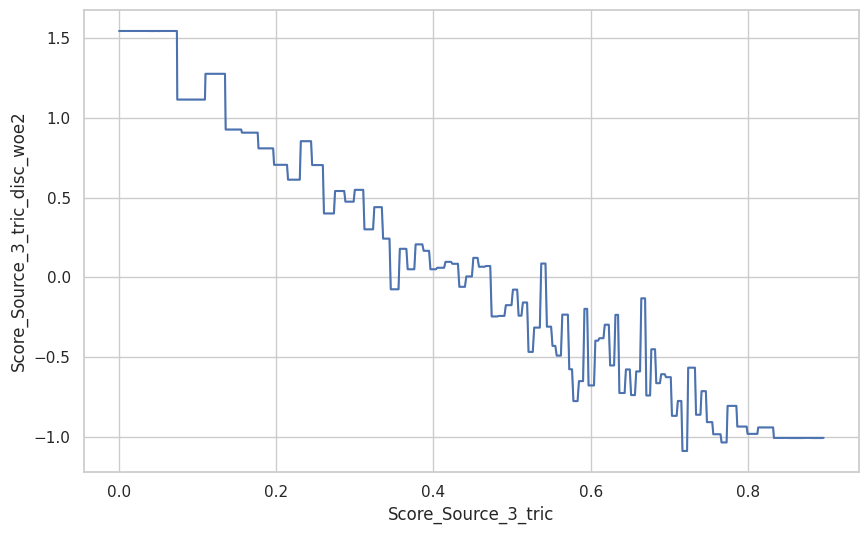

In [123]:
# Ratio del evento por tramo de la variable numérica
sns.lineplot(data=X_train, x="Score_Source_3_tric", y="Score_Source_3_tric_disc_woe2", palette = 'hls')

In [124]:
import statsmodels.api as sm

# Fit and summarize OLS model
mod = sm.OLS(X_train.Score_Source_3_tric_disc_woe2, sm.add_constant(X_train.Score_Source_3_tric_imp))
res = mod.fit(hasconst = False)
print(res.summary())


                                  OLS Regression Results                                 
Dep. Variable:     Score_Source_3_tric_disc_woe2   R-squared:                       0.863
Model:                                       OLS   Adj. R-squared:                  0.863
Method:                            Least Squares   F-statistic:                 5.362e+05
Date:                           Wed, 04 Oct 2023   Prob (F-statistic):               0.00
Time:                                   22:25:42   Log-Likelihood:                 16432.
No. Observations:                          85299   AIC:                        -3.286e+04
Df Residuals:                              85297   BIC:                        -3.284e+04
Df Model:                                      1                                         
Covariance Type:                       nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
--------

<ipython-input-125-8a85246daadc>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=X_test, x="Score_Source_3_tric", y="Score_Source_3_tric_disc_woe2", palette = 'hls')
<ipython-input-125-8a85246daadc>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=X_test.Score_Source_3_tric, y=res.predict(sm.add_constant(X_test.Score_Source_3_tric_imp)), palette = 'hls')


<Axes: xlabel='Score_Source_3_tric', ylabel='Score_Source_3_tric_disc_woe2'>

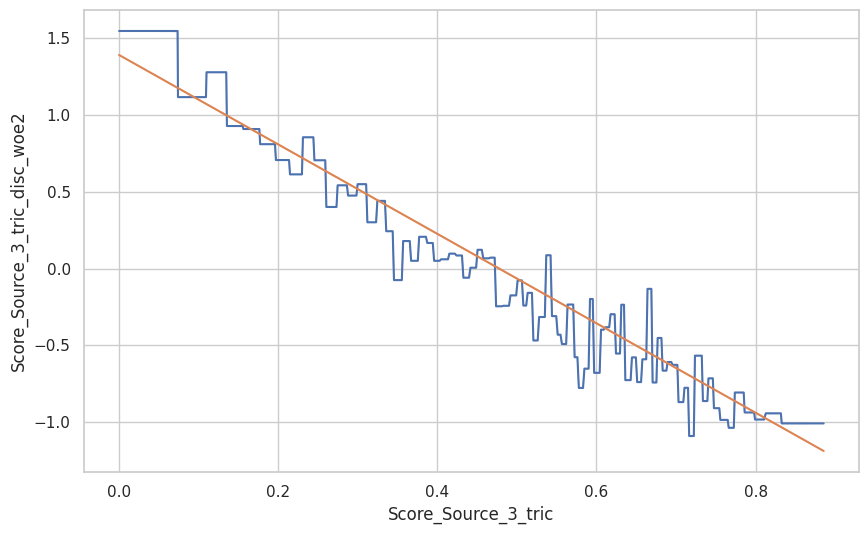

In [125]:

sns.lineplot(data=X_test, x="Score_Source_3_tric", y="Score_Source_3_tric_disc_woe2", palette = 'hls')
sns.lineplot(x=X_test.Score_Source_3_tric, y=res.predict(sm.add_constant(X_test.Score_Source_3_tric_imp)), palette = 'hls')


<ipython-input-126-e122d22985f3>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=X_train, x="Age_Days_tric_discret", y="Age_Days_tric_disc_woe2", palette = 'hls')


<Axes: xlabel='Age_Days_tric_discret', ylabel='Age_Days_tric_disc_woe2'>

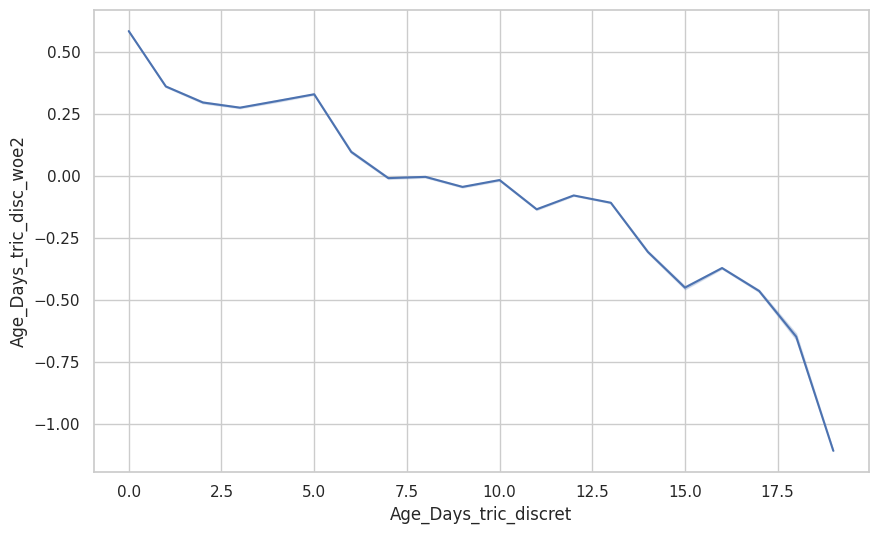

In [126]:
# Ratio del evento por tramo de la variable numérica
sns.lineplot(data=X_train, x="Age_Days_tric_discret", y="Age_Days_tric_disc_woe2", palette = 'hls')

<ipython-input-127-2729bc3f787c>:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=X_train, x="Age_Days_tric_discret", y="Age_Days_tric_disc_woe2", palette = 'hls')
<ipython-input-127-2729bc3f787c>:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=X_train.Age_Days_tric_discret, y=res.predict(sm.add_constant(X_train.Age_Days_tric_imp)), palette = 'hls')


<Axes: xlabel='Age_Days_tric_discret', ylabel='Age_Days_tric_disc_woe2'>

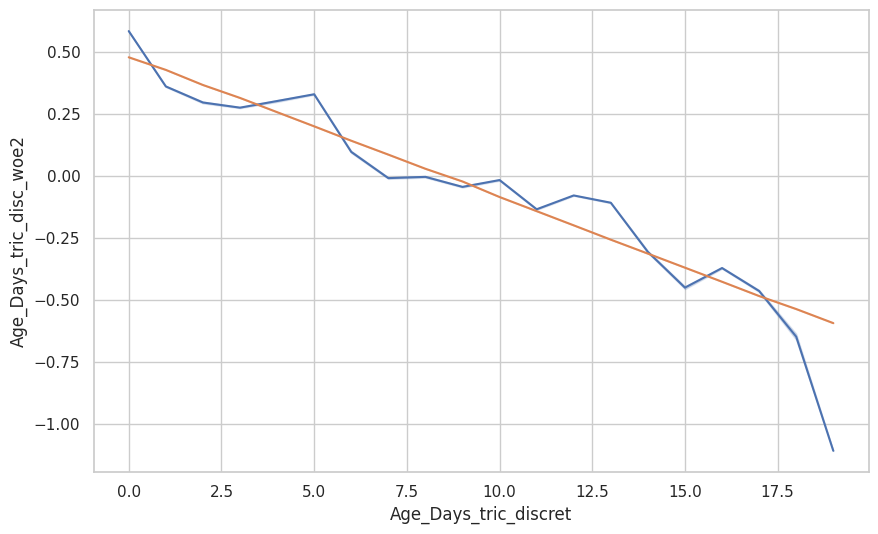

In [127]:
# Fit and summarize OLS model
mod = sm.OLS(X_train.Age_Days_tric_disc_woe2, sm.add_constant(X_train.Age_Days_tric_imp))
res = mod.fit(hasconst = False)

sns.lineplot(data=X_train, x="Age_Days_tric_discret", y="Age_Days_tric_disc_woe2", palette = 'hls')
sns.lineplot(x=X_train.Age_Days_tric_discret, y=res.predict(sm.add_constant(X_train.Age_Days_tric_imp)), palette = 'hls')


<ipython-input-128-c619bd530a3c>:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=X_train, x="Age_Days_tric_discret", y="Age_Days_tric_disc_woe2", palette = 'hls')
<ipython-input-128-c619bd530a3c>:12: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=X_train.Age_Days_tric_discret, y=res.predict(sm.add_constant(X_train.Age_Days_tric_imp.apply(lambda x: function(x)))), palette = 'hls')


<Axes: xlabel='Age_Days_tric_discret', ylabel='Age_Days_tric_disc_woe2'>

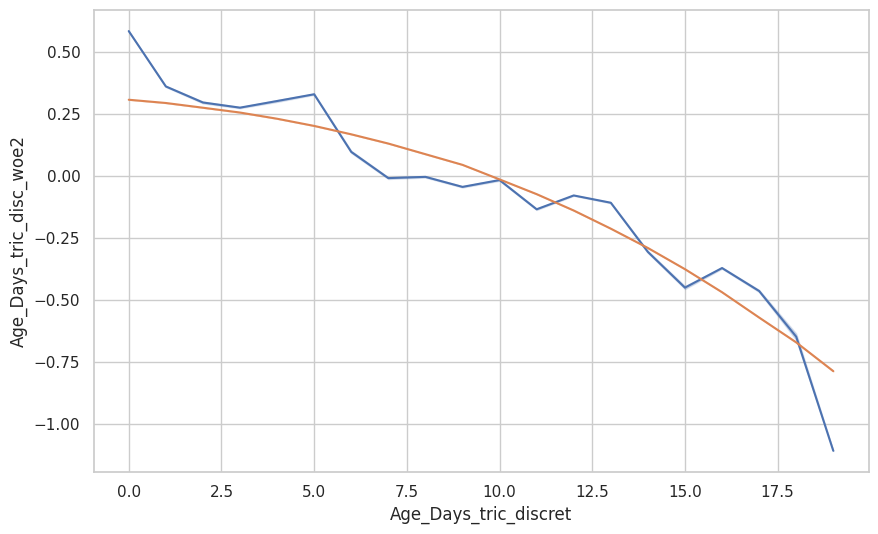

In [128]:
# Fit and summarize OLS model
from math import *

def function(x):
  return x**3

mod = sm.OLS(X_train.Age_Days_tric_disc_woe2,
             sm.add_constant(X_train.Age_Days_tric_imp.apply(lambda x: function(x))))
res = mod.fit(hasconst = False)

sns.lineplot(data=X_train, x="Age_Days_tric_discret", y="Age_Days_tric_disc_woe2", palette = 'hls')
sns.lineplot(x=X_train.Age_Days_tric_discret, y=res.predict(sm.add_constant(X_train.Age_Days_tric_imp.apply(lambda x: function(x)))), palette = 'hls')


In [129]:
print(res.summary())


                               OLS Regression Results                              
Dep. Variable:     Age_Days_tric_disc_woe2   R-squared:                       0.760
Model:                                 OLS   Adj. R-squared:                  0.760
Method:                      Least Squares   F-statistic:                 2.694e+05
Date:                     Wed, 04 Oct 2023   Prob (F-statistic):               0.00
Time:                             22:26:18   Log-Likelihood:                 36617.
No. Observations:                    85299   AIC:                        -7.323e+04
Df Residuals:                        85297   BIC:                        -7.321e+04
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

<h3> Tratamiendo por transformaciones automáticas</h3>

In [130]:
f_numeric_features = [x for x in X_train.columns.tolist() if '_tric_imp' in x]
f_numeric_features

['Score_Source_3_tric_imp',
 'Score_Source_1_tric_imp',
 'Score_Source_2_tric_imp',
 'Employed_Days_tric_imp',
 'Age_Days_tric_imp',
 'Own_House_Age_tric_imp',
 'ID_Days_tric_imp',
 'Phone_Change_tric_imp',
 'Social_Circle_Default_tric_imp',
 'Cleint_City_Rating_tric_imp',
 'Registration_Days_tric_imp',
 'Population_Region_Relative_tric_imp',
 'Application_Process_Hour_tric_imp',
 'Car_Owned_tric_imp',
 'Workphone_Working_tric_imp',
 'Credit_Amount_tric_imp',
 'Client_Income_tric_imp',
 'Credit_Bureau_tric_imp',
 'Child_Count_tric_imp',
 'Homephone_Tag_tric_imp']

In [131]:
# Calculando transformaciones
from math import *

X_train[[x + '_cuadratic' for x in f_numeric_features]] = X_train[f_numeric_features].apply(lambda x: x**2)
X_train[[x + '_cubic' for x in f_numeric_features]] = X_train[f_numeric_features].apply(lambda x: x**3)

for col in f_numeric_features:
  X_train[col + '_sqrt'] = X_train[col].apply(lambda x: sqrt(x))
  X_train[col + '_log'] = X_train[col].apply(lambda x: log(x) if x > 0 else log(0.0001))


In [132]:
# Calculando transformaciones en test
from math import *

X_test[[x + '_cuadratic' for x in f_numeric_features]] = X_test[f_numeric_features].apply(lambda x: x**2)
X_test[[x + '_cubic' for x in f_numeric_features]] = X_test[f_numeric_features].apply(lambda x: x**3)

for col in f_numeric_features:
  X_test[col + '_sqrt'] = X_test[col].apply(lambda x: sqrt(x))
  X_test[col + '_log'] = X_test[col].apply(lambda x: log(x) if x > 0 else log(0.0001))


In [133]:
# Fitteando las transformaciones
for transformation in ['_cuadratic', '_cubic', '_sqrt', '_log']:
  for col in f_numeric_features:
    mod = sm.OLS(X_train[col.replace('_imp','') + '_disc_woe2'],
                sm.add_constant(X_train[col + transformation]))
    res = mod.fit(hasconst = False)
    X_train[col + transformation + '_fitted'] = res.predict(sm.add_constant(X_train[col + transformation]))
    X_test[col + transformation + '_fitted'] = res.predict(sm.add_constant(X_test[col + transformation]))


<ipython-input-133-8f6ba026cdaa>:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_train[col + transformation + '_fitted'] = res.predict(sm.add_constant(X_train[col + transformation]))
<ipython-input-133-8f6ba026cdaa>:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_test[col + transformation + '_fitted'] = res.predict(sm.add_constant(X_test[col + transformation]))
<ipython-input-133-8f6ba026cdaa>:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has 

In [134]:
# Evaluando gini de las transformaciones

#transformed_features = [x for x in X_train.columns.tolist() if ('_fitted' in x) | ('_disc_woe' in x[-9:])]
transformed_features = [x for x in X_test.columns.tolist() if ('_fitted' in x) ]

ginis = [roc_auc_score(X_test['Default'],
                       X_test[col])*2-1 for col in transformed_features]

R2 = [X_test[[col, col.replace('_disc_woe','').replace('_imp_sqrt_fitted','').replace('_imp_cuadratic_fitted','').replace('_imp_cubic_fitted','').replace('_imp_log_fitted','') + '_disc_woe2']].corr().iloc[0][1] for col in transformed_features]

ginisTransformed = pd.DataFrame({'feature' : transformed_features,
                                 'gini' : ginis,
                                 'R2' : R2})


In [135]:
ginisTransformed

,feature,gini,R2
0,Score_Source_3_tric_imp_cuadratic_fitted,0.295873,0.904159
1,Score_Source_1_tric_imp_cuadratic_fitted,0.153097,0.909881
2,Score_Source_2_tric_imp_cuadratic_fitted,0.288433,0.936198
3,Employed_Days_tric_imp_cuadratic_fitted,0.174970,0.651614
4,Age_Days_tric_imp_cuadratic_fitted,0.154676,0.877814
...,...,...,...
75,Credit_Amount_tric_imp_log_fitted,0.018228,0.205842
76,Client_Income_tric_imp_log_fitted,0.038769,0.487814
77,Credit_Bureau_tric_imp_log_fitted,0.026021,0.697753
78,Child_Count_tric_imp_log_fitted,0.046234,0.999518


In [136]:

ginisTransformed[ginisTransformed['feature'].str.contains("Score_Source_3")]


,feature,gini,R2
0,Score_Source_3_tric_imp_cuadratic_fitted,0.295873,0.904159
20,Score_Source_3_tric_imp_cubic_fitted,0.295873,0.861049
40,Score_Source_3_tric_imp_sqrt_fitted,0.295873,0.916924
60,Score_Source_3_tric_imp_log_fitted,0.295873,0.781658


<ipython-input-137-4a21ab0a1f17>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=X_test, x="Score_Source_3_tric_discret", y="Score_Source_3_tric_disc_woe2", palette = 'hls')
<ipython-input-137-4a21ab0a1f17>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=X_test.Score_Source_3_tric_discret, y=X_test.Score_Source_3_tric_imp_sqrt_fitted, palette = 'hls')


<Axes: xlabel='Score_Source_3_tric_discret', ylabel='Score_Source_3_tric_disc_woe2'>

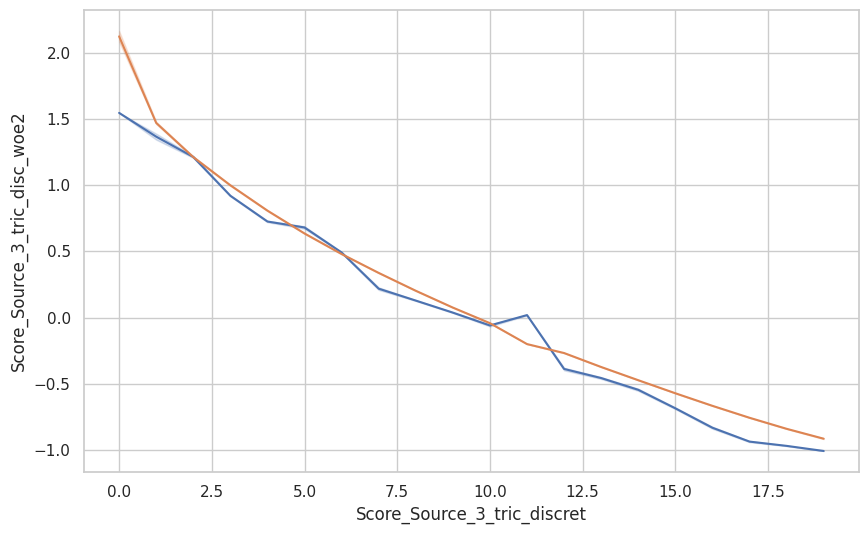

In [137]:
sns.lineplot(data=X_test, x="Score_Source_3_tric_discret", y="Score_Source_3_tric_disc_woe2", palette = 'hls')
sns.lineplot(x=X_test.Score_Source_3_tric_discret, y=X_test.Score_Source_3_tric_imp_sqrt_fitted, palette = 'hls')

In [138]:
original_features = list(set(x.replace('_tric_imp_cuadratic_fitted', '').
                       replace('_tric_imp_cubic_fitted', '').
                       replace('_tric_imp_sqrt_fitted', '').
                       replace('_tric_imp_log_fitted', '').
                       replace('_tric_disc_woe', '') for x in ginisTransformed.feature.tolist()))

In [139]:
original_features

['Credit_Bureau',
 'Child_Count',
 'Score_Source_2',
 'Application_Process_Hour',
 'ID_Days',
 'Cleint_City_Rating',
 'Homephone_Tag',
 'Social_Circle_Default',
 'Car_Owned',
 'Workphone_Working',
 'Credit_Amount',
 'Employed_Days',
 'Age_Days',
 'Population_Region_Relative',
 'Score_Source_3',
 'Registration_Days',
 'Own_House_Age',
 'Phone_Change',
 'Score_Source_1',
 'Client_Income']

In [140]:

argmax_indexes = [ginisTransformed[ginisTransformed['feature'].str.contains(col)].R2.argmax() for col in original_features]
argmax_indexes

[3, 3, 0, 2, 0, -1, -1, 0, -1, -1, 1, 3, 0, 0, 2, 0, 2, 0, 0, 1]

In [141]:
best_features = []

for x in original_features:
  location = ginisTransformed[ginisTransformed['feature'].str.contains(x)].R2.argmax()
  best_features.append(ginisTransformed[ginisTransformed['feature'].str.contains(x)].iloc[location].feature)


In [142]:
best_features

['Credit_Bureau_tric_imp_log_fitted',
 'Child_Count_tric_imp_log_fitted',
 'Score_Source_2_tric_imp_cuadratic_fitted',
 'Application_Process_Hour_tric_imp_sqrt_fitted',
 'ID_Days_tric_imp_cuadratic_fitted',
 'Cleint_City_Rating_tric_imp_log_fitted',
 'Homephone_Tag_tric_imp_log_fitted',
 'Social_Circle_Default_tric_imp_cuadratic_fitted',
 'Car_Owned_tric_imp_log_fitted',
 'Workphone_Working_tric_imp_log_fitted',
 'Credit_Amount_tric_imp_cubic_fitted',
 'Employed_Days_tric_imp_log_fitted',
 'Age_Days_tric_imp_cuadratic_fitted',
 'Population_Region_Relative_tric_imp_cuadratic_fitted',
 'Score_Source_3_tric_imp_sqrt_fitted',
 'Registration_Days_tric_imp_cuadratic_fitted',
 'Own_House_Age_tric_imp_sqrt_fitted',
 'Phone_Change_tric_imp_cuadratic_fitted',
 'Score_Source_1_tric_imp_cuadratic_fitted',
 'Client_Income_tric_imp_cubic_fitted']

## 6. Modelo

In [143]:
best_cat_features = [x + '_woe' for x in categorical_features]
best_cat_features

['Accompany_Client_woe',
 'Client_Income_Type_woe',
 'Client_Education_woe',
 'Client_Marital_Status_woe',
 'Client_Gender_woe',
 'Loan_Contract_Type_woe',
 'Client_Housing_Type_woe',
 'Client_Occupation_woe',
 'Client_Permanent_Match_Tag_woe',
 'Client_Contact_Work_Tag_woe',
 'Type_Organization_woe']

In [144]:
import statsmodels.api as sm

# Fit and summarize OLS model
mod = sm.Logit(y_train, sm.add_constant(X_train[best_features + best_cat_features]))
res = mod.fit()


Optimization terminated successfully.
         Current function value: 0.254463
         Iterations 11


In [145]:
print(res.summary())

                           Logit Regression Results                           
Dep. Variable:                Default   No. Observations:                85299
Model:                          Logit   Df Residuals:                    85271
Method:                           MLE   Df Model:                           27
Date:                Wed, 04 Oct 2023   Pseudo R-squ.:                 0.09343
Time:                        22:26:26   Log-Likelihood:                -21705.
converged:                       True   LL-Null:                       -23942.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
Credit_Bureau_tric_imp_log_fitted                        0.6422      0.233      2.758      0.006       0.186       1.099
Child

Método Backward en python

In [146]:
actual_features = best_features + best_cat_features

In [150]:
%%capture
import copy

# Realizar una copia profunda de la lista
features_to_backward = copy.deepcopy(actual_features)

# Fit and summarize OLS model
lr = sm.Logit(y_train,
              sm.add_constant(X_train[features_to_backward]))
model = lr.fit()

while sum(model.pvalues > 0.02) >= 1:
  toRemove = pd.DataFrame(model.pvalues).idxmax(axis=0)[0]
  print(f'Retirando la variable: {toRemove}')
  features_to_backward.remove(toRemove)

  # Fit and summarize OLS model
  lr = sm.Logit(y_train,
                sm.add_constant(X_train[features_to_backward]))
  model = lr.fit()


In [148]:
print(model.summary())

                           Logit Regression Results                           
Dep. Variable:                Default   No. Observations:                85299
Model:                          Logit   Df Residuals:                    85281
Method:                           MLE   Df Model:                           17
Date:                Wed, 04 Oct 2023   Pseudo R-squ.:                 0.09297
Time:                        22:26:31   Log-Likelihood:                -21716.
converged:                       True   LL-Null:                       -23942.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                      coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
const                                              -2.3847      0.016   -152.108      0.000      -2.415      -2.354
Credit_Bureau_tric_i

Correlación entre las variables

In [149]:
X_train[features_to_backward].corr()

,Credit_Bureau_tric_imp_log_fitted,Score_Source_2_tric_imp_cuadratic_fitted,Application_Process_Hour_tric_imp_sqrt_fitted,ID_Days_tric_imp_cuadratic_fitted,Social_Circle_Default_tric_imp_cuadratic_fitted,Credit_Amount_tric_imp_cubic_fitted,Employed_Days_tric_imp_log_fitted,Score_Source_3_tric_imp_sqrt_fitted,Own_House_Age_tric_imp_sqrt_fitted,Phone_Change_tric_imp_cuadratic_fitted,Score_Source_1_tric_imp_cuadratic_fitted,Client_Education_woe,Client_Gender_woe,Loan_Contract_Type_woe,Client_Occupation_woe,Client_Permanent_Match_Tag_woe,Type_Organization_woe
Credit_Bureau_tric_imp_log_fitted,1.000000,0.025342,0.028069,-0.008875,0.022036,0.045604,-0.023952,0.002871,0.022106,-0.065866,0.003994,0.069229,-0.005630,0.050893,0.040854,0.000999,0.020485
Score_Source_2_tric_imp_cuadratic_fitted,0.025342,1.000000,0.158567,0.052744,0.101363,0.121264,0.054357,0.088942,0.061278,0.164738,0.143465,0.131881,0.013142,0.021046,0.088030,0.038373,0.015779
Application_Process_Hour_tric_imp_sqrt_fitted,0.028069,0.158567,1.000000,-0.024358,0.078170,0.046241,-0.067530,-0.032197,0.073451,0.018527,0.032914,0.080656,-0.005669,0.035665,0.013047,-0.015396,-0.052269
ID_Days_tric_imp_cuadratic_fitted,-0.008875,0.052744,-0.024358,1.000000,0.011879,0.009687,0.244563,0.107225,-0.005342,0.088874,0.082422,-0.023510,0.009316,-0.043132,0.081003,0.072799,0.160286
Social_Circle_Default_tric_imp_cuadratic_fitted,0.022036,0.101363,0.078170,0.011879,1.000000,0.057946,-0.008710,0.008130,0.046522,0.019273,0.048624,0.089708,-0.004200,0.014990,0.040415,0.067500,0.003083
Credit_Amount_tric_imp_cubic_fitted,0.045604,0.121264,0.046241,0.009687,0.057946,1.000000,0.023962,0.040857,0.063955,0.057079,0.103829,0.129257,-0.021989,-0.135120,0.082011,0.022281,0.003964
Employed_Days_tric_imp_log_fitted,-0.023952,0.054357,-0.067530,0.244563,-0.008710,0.023962,1.000000,0.124949,0.008367,0.080656,0.177021,-0.071732,0.154418,-0.063443,0.247360,0.141226,0.420034
Score_Source_3_tric_imp_sqrt_fitted,0.002871,0.088942,-0.032197,0.107225,0.008130,0.040857,0.124949,1.000000,-0.014397,0.058502,0.088186,-0.023561,0.007580,-0.002200,0.021820,0.061860,0.054224
Own_House_Age_tric_imp_sqrt_fitted,0.022106,0.061278,0.073451,-0.005342,0.046522,0.063955,0.008367,-0.014397,1.000000,-0.005270,0.045228,0.090252,0.043626,0.013940,0.079194,0.010547,0.010964
Phone_Change_tric_imp_cuadratic_fitted,-0.065866,0.164738,0.018527,0.088874,0.019273,0.057079,0.080656,0.058502,-0.005270,1.000000,0.087589,0.007028,0.018156,-0.054806,0.026458,0.054744,0.010113


In [ ]:
len(best_features[:4] + best_cat_features[:4])

#### Iterando todos los posibles modelos en base a las variables seleccionadas

In [166]:
from itertools import combinations
import random

result = combinations(features_to_backward, 5)

# Vamos a seleccionar 1000 combinaciones aleatoriamente sin convertir todo a una lista
selected_combinations = random.sample(list(result), 10)

In [186]:
%%capture
gini_train_models = []
gini_test_models = []
combination = []

for featuresToreg in selected_combinations:
  try:
    mod = sm.Logit(y_train, sm.add_constant(X_train[list(featuresToreg)]))
    res = mod.fit()
    if sum(res.pvalues > 0.05) == 0:
      gini_train_models.append(roc_auc_score(y_train, res.predict(sm.add_constant(X_train[list(featuresToreg)])))*2-1)
      gini_test_models.append(roc_auc_score(y_test, res.predict(sm.add_constant(X_test[list(featuresToreg)])))*2-1)
      combination.append(list(featuresToreg))
  except:
    print('error')


In [ ]:
pd.options.display.max_colwidth = 1000
modelsIterations = pd.DataFrame({'combination' : combination,
                                 'gini'        : gini_test_models}).sort_values(by = 'gini', ascending=False)
modelsIterations.head(10)

In [ ]:
combination_list = modelsIterations['combination'].iloc[0]
combination_list

In [189]:
modelo = combination_list

In [ ]:
import statsmodels.api as sm

mod = sm.Logit(y_train, sm.add_constant(X_train[modelo]))
modelo_fitted = mod.fit()
print(modelo_fitted.summary())


Pesos de las variables

In [198]:
# Calcular estadístico de Wald
wald_statistics = (modelo_fitted.params / modelo_fitted.bse) ** 2

# Excluir la constante
variables = modelo_fitted.model.exog_names
wald_statistics = [wald for var, wald in zip(variables, wald_statistics) if var != 'const']
variables = [var for var in variables if var != 'const']

# Calcular los pesos porcentuales basados en Wald
total_wald = sum(wald_statistics)
wald_percent_weights = [(var, (wald_stat/total_wald) * 100) for var, wald_stat in zip(variables, wald_statistics)]

# Ordenar las variables basadas en el peso porcentual
sorted_vars = sorted(wald_percent_weights, key=lambda x: x[1], reverse=True)

for var, weight in sorted_vars:
    print(f"{var}: {weight:.2f}%")

Score_Source_2_tric_imp_cuadratic_fitted: 89.05%
Client_Permanent_Match_Tag_woe: 5.38%
Loan_Contract_Type_woe: 2.86%
Own_House_Age_tric_imp_sqrt_fitted: 2.16%
Credit_Bureau_tric_imp_log_fitted: 0.55%


#### Control de correlaciones

In [ ]:
X_train[modelo].corr()

In [ ]:
X_test[modelo].corr()

In [ ]:
sns.heatmap(X_test[modelo].corr(), vmin=0, vmax=1)

#### Estabilidad del modelo

In [211]:
X_train['PD'] = modelo_fitted.predict_proba(X_train[modelo])[:, 1]
X_test['PD'] = modelo_fitted.predict_proba(X_test[modelo])[:, 1]

In [217]:
gini_mensual_train = X_train.groupby('codmes').apply(lambda x: 2*roc_auc_score(x['Default'], x['PD']) - 1)
gini_mensual_test = X_test.groupby('codmes').apply(lambda x: 2*roc_auc_score(x['Default'], x['PD']) - 1)

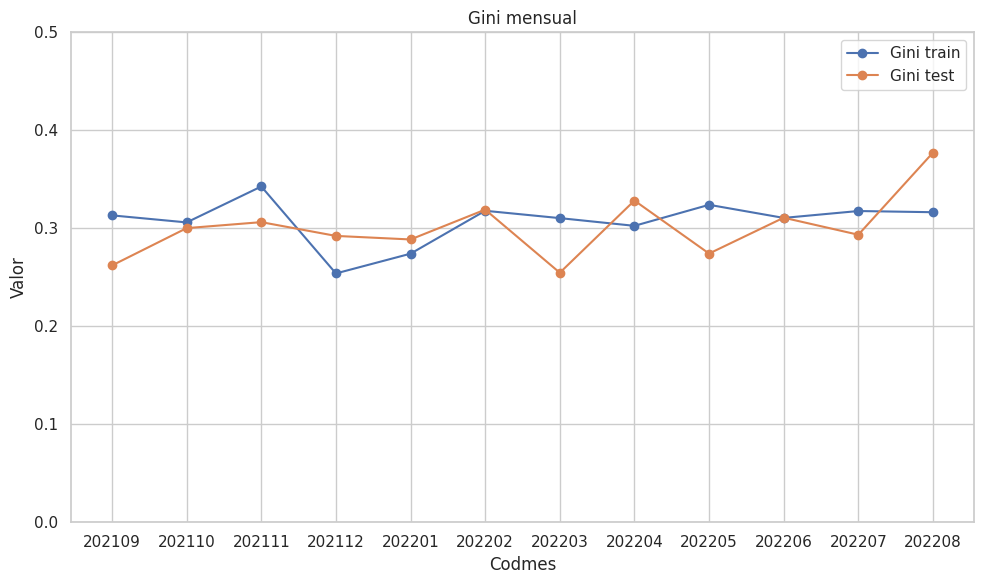

In [222]:
# Graficar las series
plt.figure(figsize=(10, 6))

# Convertir índices a strings para tratarlos como categóricos
gini_mensual_train.index = gini_mensual_train.index.astype(str)
gini_mensual_test.index = gini_mensual_test.index.astype(str)

plt.plot(gini_mensual_train.index, gini_mensual_train.values, label='Gini train', marker='o')
plt.plot(gini_mensual_test.index,  gini_mensual_test.values,  label='Gini test', marker='o')
plt.ylim(ymin=0, ymax=0.5)

plt.title('Gini mensual')
plt.xlabel('Codmes')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [224]:
X_test.groupby('Client_Gender').apply(lambda x: 2*roc_auc_score(x['Default'], x['PD']) - 1)

Client_Gender
Female    0.318536
Male      0.281407
dtype: float64

## Desbalanceo de muestra

Regresión logística usando sklearn

In [202]:
from sklearn import linear_model

modelo_fitted = linear_model.LogisticRegression(
                                         max_iter = 1000,
                                         random_state = 123)
modelo_fitted.fit(X_train[modelo], y_train)


LogisticRegression(max_iter=1000, random_state=123)

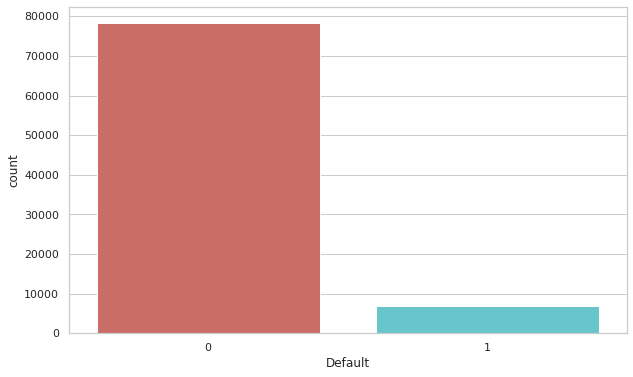

In [ ]:
# Analizando el target
sns.countplot(x='Default', data = X_train, palette = 'hls')

In [ ]:
X_train.Default.value_counts()

0    78408
1     6891
Name: Default, dtype: int64

In [ ]:
78408/6891

11.378319547235524

In [ ]:
# Modelo
from sklearn import linear_model

logreg_class_weight = linear_model.LogisticRegression(class_weight = {0: 1, 1: 11.378319547235524},
                                         max_iter = 1000,
                                         random_state = 123)
logreg_class_weight.fit(X_train[modelo], y_train)

LogisticRegression(class_weight={0: 1, 1: 11.378319547235524}, max_iter=1000,
                   random_state=123)

In [ ]:
pd.DataFrame({'pd' : logreg_class_weight.predict_proba(X_train[modelo])[:,1]}).describe()


,pd
count,85299.000000
mean,0.435897
std,0.183306
min,0.025670
25%,0.292718
50%,0.421950
75%,0.566255
max,0.970241


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd6274ba150>]],
      dtype=object)

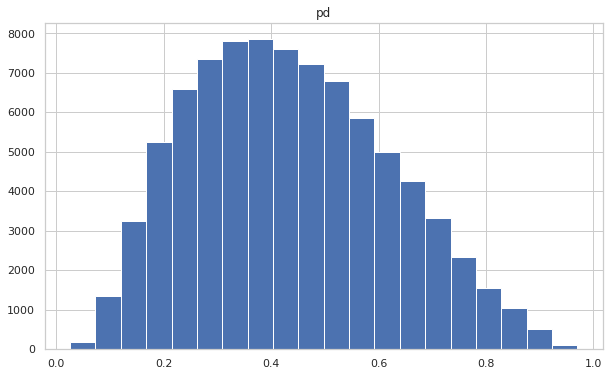

In [ ]:
pd.DataFrame({'pd' : logreg_class_weight.predict_proba(X_train[modelo])[:,1]}).hist(bins= 20)

In [ ]:
X_train['Default'].describe()

count    85299.000000
mean         0.080786
std          0.272508
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Default, dtype: float64

In [ ]:
# Analizando los parámetros del modelo
paramLogistic = pd.DataFrame({'feature': modelo,
                              'parámetro_weith': logreg_class_weight.coef_.ravel()}).copy()
paramLogistic

### Balanceo por SMOTE

## SMOTE Algorithm


<b>Synthetic Minority Oversampling Technique</b>

Es uno de los métodos de sobremuestreo más utilizados para resolver el problema del desbalanceo.
Su objetivo es equilibrar la distribución de clases aumentando aleatoriamente los ejemplos de clases minoritarias al replicarlos.


SMOTE sintetiza nuevas instancias minoritarias entre instancias minoritarias existentes. Genera los registros de entrenamiento virtual por interpolación lineal para la clase minoritaria. Estos registros de entrenamiento sintéticos se generan seleccionando aleatoriamente uno o más de los k vecinos más cercanos para cada ejemplo en la clase minoritaria. Después del proceso de sobremuestreo, los datos se reconstruyen y se pueden aplicar varios modelos de clasificación para los datos procesados.
¡Más información detallada sobre cómo funciona el algoritmo SMOTE!

<strong>Puede consultar este [link](https://imbalanced-learn.org/stable/generated/imblearn.over_sampling.SMOTE.html) para leer más sobre SMOTE.</strong>

<img src="https://i.ytimg.com/vi/U3X98xZ4_no/maxresdefault.jpg" alt="HTML5 Icon" style="width: 400px; height: 250px;">





In [ ]:
# Aplicando SMOTE para oversampling

from imblearn.over_sampling import SMOTE


In [ ]:
sm = SMOTE(random_state = 123)
X_train_res, y_train_res = sm.fit_resample(X_train[modelo], X_train['Default'])


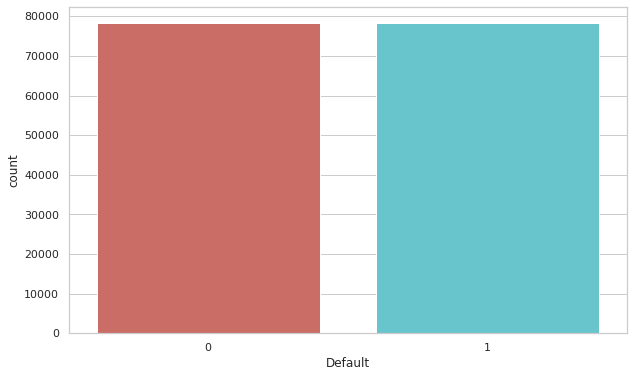

In [ ]:
# Analizando el target
sns.countplot(x = y_train_res, palette = 'hls')

In [ ]:
# Modelo
from sklearn import linear_model

logsmote = linear_model.LogisticRegression(max_iter = 1000,
                                         random_state = 123)
logsmote.fit(X_train_res[modelo], y_train_res)

LogisticRegression(max_iter=1000, random_state=123)

In [225]:
pd.DataFrame({'pd' : logsmote.predict_proba(X_train[modelo])[:,1]}).hist(bins= 20)

In [225]:
# Analizando los parámetros del modelo
paramLogistic_smote = pd.DataFrame({'feature': modelo,
                                    'parámetro_smote': logsmote.coef_.ravel()})
paramLogistic_smote

In [225]:
pd.merge(paramLogistic_smote, paramLogistic, on = 'feature')

In [225]:
# Gini del modelo (lo normal es que este arriba de 40%)
gini_log = sklearn.metrics.roc_auc_score(X_test['Default'], modelo_fitted.predict_proba(X_test[modelo])[:,1])*2-1
gini_weith = sklearn.metrics.roc_auc_score(X_test['Default'], logreg_class_weight.predict_proba(X_test[modelo])[:,1])*2-1
gini_smote = sklearn.metrics.roc_auc_score(X_test['Default'], logsmote.predict_proba(X_test[modelo])[:,1])*2-1

print(f'El gini del modelo sin balancear es: {gini_log}')
print(f'El gini del modelo balanceado por pesos es: {gini_weith}')
print(f'El gini del modelo balanceado por smote es: {gini_smote}')


In [ ]:
logreg.predict(X_train[modelo])

In [225]:
# accuracy del modelo en base desbalanceada (lo normal es que este arriba de 80%)
accuracy_log = sklearn.metrics.accuracy_score(y_train, modelo_fitted.predict(X_train[modelo]))
accuracy_weith = sklearn.metrics.accuracy_score(y_train, logreg_class_weight.predict(X_train[modelo]))
accuracy_smote = sklearn.metrics.accuracy_score(y_train, logsmote.predict(X_train[modelo]))

print(f'El accuracy del modelo sin balancear es: {accuracy_log}')
print(f'El accuracy del modelo balanceado por pesos es: {accuracy_weith}')
print(f'El accuracy del modelo balanceado por smote es: {accuracy_smote}')

In [225]:
# f1_score del modelo en base desbalanceada (lo normal es que este arriba de 60%)
f1_score_log = sklearn.metrics.f1_score(y_train, modelo_fitted.predict(X_train[modelo]))
f1_score_weith = sklearn.metrics.f1_score(y_train, logreg_class_weight.predict(X_train[modelo]))
f1_score_smote = sklearn.metrics.f1_score(y_train, logsmote.predict(X_train[modelo]))

print(f'El f1_score del modelo sin balancear es: {f1_score_log}')
print(f'El f1_score del modelo balanceado por pesos es: {f1_score_weith}')
print(f'El f1_score del modelo balanceado por smote es: {f1_score_smote}')

### modelo con variables finales

In [ ]:
modelo_f = ['Employed_Days_tric_imp_log_fitted',
          'Score_Source_1_tric_imp_cuadratic_fitted',
          'Score_Source_2_tric_imp_cuadratic_fitted',
          'Score_Source_3_tric_imp_sqrt_fitted',
          'Client_Education_woe',
          'Loan_Contract_Type_woe',
          'Client_Permanent_Match_Tag_woe',
          'Type_Organization_woe']

In [ ]:
# Modelo
from sklearn import linear_model

logf = linear_model.LogisticRegression(max_iter = 1000,
                                         random_state = 123)
logf.fit(X_train[modelo_f], y_train)

LogisticRegression(max_iter=1000, random_state=123)

In [225]:
# Analizando los parámetros del modelo
paramLogistic_f = pd.DataFrame({'feature': modelo_f,
                                'parámetro': logf.coef_.ravel()})
paramLogistic_f

In [ ]:
# Gini del modelo (lo normal es que este arriba de 40%)
gini_f = sklearn.metrics.roc_auc_score(X_train['Default'], logf.predict_proba(X_train[modelo_f])[:,1])*2-1
print(f'El gini del modelo final es: {gini_f}')


El gini del modelo final es: 0.44642769838402696


In [ ]:
# Usando el modelo para predecir

X_train['probability'] = logf.predict_proba(X_train[modelo_f])[:,1]
X_train['prediction'] = logf.predict(X_train[modelo_f])


In [225]:
#Resumen de todas las métricas del modelo
from sklearn.metrics import *
metricsLogisitc = pd.DataFrame({'metric':['AUC','Gini','Accuracy','Precision','Recall','F1-score'],
                                'logistic_train':[roc_auc_score(y_train, X_train.probability),
                                        (roc_auc_score(y_train, X_train.probability)*2-1),
                                        accuracy_score(y_train, X_train.prediction),
                                        precision_score(y_train, X_train.prediction),
                                        recall_score(y_train, X_train.prediction),
                                        f1_score(y_train, X_train.prediction)]})

metricsLogisitc

## Boostrapping



<img src="https://miro.medium.com/max/1400/1*9x2lAp3QF2FyIyQNaePkVA.png" alt="HTML5 Icon" style="width: 1600px; height: 1250px;">

---



In [ ]:
pddf_boostrap = pd.DataFrame(columns = modelo_f)
pddf_boostrap


In [ ]:
for i in range(100):
  X_to_use, X_to_drop = train_test_split(X_train,
                                         stratify = X_train['Default'],
                                         train_size = 0.6,
                                         random_state = i, shuffle = True)

  logreg = linear_model.LogisticRegression(max_iter = 1000,
                                          random_state = 123)
  logreg.fit(X_to_use[modelo_f], X_to_use['Default'])
  pddf_boostrap = pddf_boostrap.append(pd.DataFrame(logreg.coef_[0].tolist(), index = modelo_f).transpose())


In [225]:
pddf_boostrap.head()

In [225]:
pddf_boostrap.Employed_Days_tric_imp_log_fitted.hist()

In [225]:
pddf_boostrap.describe().transpose()

## 7. Implementación

In [ ]:
# Target Encoding
from category_encoders.woe import WOEEncoder
encoder = WOEEncoder()
WOEEncoder = encoder.fit(X_train[categorical_features], X_train['Default'])

In [ ]:
import pickle

objectToSave = WOEEncoder
filename = "./WOEEncoder_catergorical_feature.enc"
pickle.dump(objectToSave, open(filename, 'wb'))
print("done")


done


In [ ]:
filename = "./WOEEncoder_catergorical_feature.enc"
loaded_encoder = pickle.load(open(filename, 'rb'))

In [ ]:
loaded_encoder

In [ ]:
# Usando reglas de encoding
X_test[categorical_features] = X_test[categorical_features].replace(np.nan,'missing')
X_test[[x + '_woe' for x in categorical_features]] = WOEEncoder.transform(X_test[categorical_features])

pddf[categorical_features] = pddf[categorical_features].replace(np.nan,'missing')
pddf[[x + '_woe' for x in categorical_features]] = WOEEncoder.transform(pddf[categorical_features])



In [ ]:
# Tratamiento de outliers por RIC

for col in univariate_II.feature.tolist():
  desc = univariate_II.loc[univariate_II.feature == col]
  X_test[col + '_tric'] = X_test[col].apply(lambda x: desc.max_ric.values[0] if x > desc.max_ric.values[0]
                                                   else desc.min_ric.values[0] if x < desc.min_ric.values[0]
                                                   else x)
  pddf[col + '_tric'] = pddf[col].apply(lambda x: desc.max_ric.values[0] if x > desc.max_ric.values[0]
                                                   else desc.min_ric.values[0] if x < desc.min_ric.values[0]
                                                   else x)


X_test.head()

In [ ]:
# Tratamiento de missings
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values = np.nan, strategy='median')
imp_mean = imp_mean.fit(X_train[f_numeric_features])

In [ ]:
#usando Tratamiento de missings

X_test[[x + '_imp' for x in [col + '_tric' for col in univariate_II.feature.tolist()]]] = imp_mean.transform(X_test[[col + '_tric' for col in univariate_II.feature.tolist()]])
pddf[[x + '_imp' for x in [col + '_tric' for col in univariate_II.feature.tolist()]]] = imp_mean.transform(pddf[[col + '_tric' for col in univariate_II.feature.tolist()]])

X_test[[x + '_imp' for x in [col + '_tric' for col in univariate_II.feature.tolist()]]].head()


In [ ]:
# Calculando transformaciones

X_test['Score_Source_1_tric_imp_cuadratic'] = X_test['Score_Source_1_tric_imp'].apply(lambda x: x**2)
X_test['Score_Source_2_tric_imp_cuadratic'] = X_test['Score_Source_2_tric_imp'].apply(lambda x: x**2)
X_test['Score_Source_3_tric_imp_sqrt'] = X_test['Score_Source_3_tric_imp'].apply(lambda x: sqrt(x))
X_test['Employed_Days_tric_imp_log'] = X_test['Employed_Days_tric_imp'].apply(lambda x: log(x) if x > 0 else log(0.0001))

pddf['Score_Source_1_tric_imp_cuadratic'] = pddf['Score_Source_1_tric_imp'].apply(lambda x: x**2)
pddf['Score_Source_2_tric_imp_cuadratic'] = pddf['Score_Source_2_tric_imp'].apply(lambda x: x**2)
pddf['Score_Source_3_tric_imp_sqrt'] = pddf['Score_Source_3_tric_imp'].apply(lambda x: sqrt(x))
pddf['Employed_Days_tric_imp_log'] = pddf['Employed_Days_tric_imp'].apply(lambda x: log(x) if x > 0 else log(0.0001))


In [ ]:
features_mod = ['Score_Source_1_tric_imp',
                'Score_Source_2_tric_imp',
                'Score_Source_3_tric_imp',
                'Employed_Days_tric_imp']

In [ ]:
# Fitteando las transformaciones
%%capture
import statsmodels.api as sm

for transformation in ['_cuadratic', '_sqrt', '_log']:
  for col in features_mod:
    mod = sm.OLS(X_train[col.replace('imp','') + 'disc_woe2'],
                 sm.add_constant(X_train[col + transformation]))
    res = mod.fit(hasconst = False)
    print(res.summary())

In [ ]:

X_test['Score_Source_1_tric_imp_cuadratic_fitted'] = -2.5973*X_test.Score_Source_1_tric_imp_cuadratic + 0.6469
X_test['Score_Source_2_tric_imp_cuadratic_fitted'] = -3.0359*X_test.Score_Source_2_tric_imp_cuadratic + 0.8030
X_test['Score_Source_3_tric_imp_sqrt_fitted'] = -3.5878*X_test.Score_Source_3_tric_imp_sqrt + 2.4178
X_test['Employed_Days_tric_imp_log_fitted'] = -0.2486*X_test.Employed_Days_tric_imp_log + 1.8668

pddf['Score_Source_1_tric_imp_cuadratic_fitted'] = -2.5973*pddf.Score_Source_1_tric_imp_cuadratic + 0.6469
pddf['Score_Source_2_tric_imp_cuadratic_fitted'] = -3.0359*pddf.Score_Source_2_tric_imp_cuadratic + 0.8030
pddf['Score_Source_3_tric_imp_sqrt_fitted'] = -3.5878*pddf.Score_Source_3_tric_imp_sqrt + 2.4178
pddf['Employed_Days_tric_imp_log_fitted'] = -0.2486*pddf.Employed_Days_tric_imp_log + 1.8668


In [ ]:
# Usando el modelo para predecir

X_test['XB'] = (-2.4265 + X_test['Score_Source_2_tric_imp_cuadratic_fitted']*0.8638
                        + X_test['Score_Source_3_tric_imp_sqrt_fitted']*0.8171
                        + X_test['Employed_Days_tric_imp_log_fitted']*0.4190
                        + X_test['Score_Source_1_tric_imp_cuadratic_fitted']*0.4973
                        + X_test['Client_Education_woe']*0.7127
                        + X_test['Client_Gender_woe']*0.4495
                        + X_test['Loan_Contract_Type_woe']*1.0069
                        + X_test['Client_Occupation_woe']*0.2775
                        + X_test['Client_Permanent_Match_Tag_woe']*0.3429
                        + X_test['Type_Organization_woe']*0.5067)

X_test['PD'] = X_test.XB.apply(lambda x: 1/(1 + exp(-x)))
X_test['prediction'] = X_test.PD.apply(lambda x: 1 if x > 0.5 else 0)

In [ ]:
# Usando el modelo para predecir

pddf['XB'] = (-2.4265 + pddf['Score_Source_2_tric_imp_cuadratic_fitted']*0.8638
                        + pddf['Score_Source_3_tric_imp_sqrt_fitted']*0.8171
                        + pddf['Employed_Days_tric_imp_log_fitted']*0.4190
                        + pddf['Score_Source_1_tric_imp_cuadratic_fitted']*0.4973
                        + pddf['Client_Education_woe']*0.7127
                        + pddf['Client_Gender_woe']*0.4495
                        + pddf['Loan_Contract_Type_woe']*1.0069
                        + pddf['Client_Occupation_woe']*0.2775
                        + pddf['Client_Permanent_Match_Tag_woe']*0.3429
                        + pddf['Type_Organization_woe']*0.5067)

pddf['PD'] = pddf.XB.apply(lambda x: 1/(1 + exp(-x)))
pddf['prediction'] = pddf.PD.apply(lambda x: 1 if x > 0.5 else 0)

In [ ]:
# Usando el modelo para predecir

X_train['XB'] = (-2.4265 + X_train['Score_Source_2_tric_imp_cuadratic_fitted']*0.8638
                        + X_train['Score_Source_3_tric_imp_sqrt_fitted']*0.8171
                        + X_train['Employed_Days_tric_imp_log_fitted']*0.4190
                        + X_train['Score_Source_1_tric_imp_cuadratic_fitted']*0.4973
                        + X_train['Client_Education_woe']*0.7127
                        + X_train['Client_Gender_woe']*0.4495
                        + X_train['Loan_Contract_Type_woe']*1.0069
                        + X_train['Client_Occupation_woe']*0.2775
                        + X_train['Client_Permanent_Match_Tag_woe']*0.3429
                        + X_train['Type_Organization_woe']*0.5067)

X_train['PD'] = X_train.XB.apply(lambda x: 1/(1 + exp(-x)))
X_train['prediction']  = X_train.PD.apply(lambda x: 1 if x > 0.5 else 0)


In [ ]:
#Resumen de todas las métricas del modelo
from sklearn.metrics import *

metrics = pd.DataFrame({'metric':['AUC','Gini','Accuracy','Precision','Recall','F1-score'],
                                'logit_train':[roc_auc_score(y_train, X_train.PD),
                                              (roc_auc_score(y_train, X_train.PD)*2-1),
                                               accuracy_score(y_train, X_train.prediction),
                                               precision_score(y_train, X_train.prediction),
                                               recall_score(y_train, X_train.prediction),
                                               f1_score(y_train, X_train.prediction)],

                                'logit_test':[roc_auc_score(y_test, X_test.PD),
                                              roc_auc_score(y_test, X_test.PD)*2-1,
                                              accuracy_score(y_test, X_test.prediction),
                                              precision_score(y_test, X_test.prediction),
                                              recall_score(y_test, X_test.prediction),
                                              f1_score(y_test, X_test.prediction)]})
metrics

,metric,logit_train,logit_test
0,AUC,0.725210,0.727400
1,Gini,0.450419,0.454800
2,Accuracy,0.919026,0.919222
3,Precision,0.418367,0.515152
4,Recall,0.005950,0.005755
5,F1-score,0.011733,0.011383


In [ ]:
def plot_roc_curve(y_true, y_score, filepath=None, line_width=2, width=12,
                   height=10, title=None, colors=("#FF0000", "#000000")):
    """
    Saves a ROC curve in a file or shows it on screen.
    :param y_true: actual values of the response (list|np.array)
    :param y_score: predicted scores (list|np.array)
    :param filepath: if given, the ROC curve is saved in the desired filepath. It should point to a png file in an
    existing directory. If not specified, the curve is only shown (str)
    :param line_width: number indicating line width (float)
    :param width: number indicating the width of saved plot (float)
    :param height: number indicating the height of saved plot (float)
    :param title: if given, title to add to the top side of the plot (str)
    :param colors: color specification for ROC curve and diagonal respectively (tuple of str)
    :return: None
    """
    fpr, tpr, _ = roc_curve(y_true=y_true, y_score=y_score)
    gini = auc(fpr, tpr) * 2 - 1

    sns.set_style("whitegrid")
    fig = plt.figure(figsize=(width, height))
    major_ticks = np.arange(0, 1.1, 0.1)
    minor_ticks = np.arange(0.05, 1, 0.1)
    ax = fig.add_subplot(1, 1, 1)
    ax.set_xticks(major_ticks)
    ax.set_yticks(major_ticks)
    ax.set_xticks(minor_ticks, minor=True)
    ax.set_yticks(minor_ticks, minor=True)
    ax.grid(which="both", axis="both")
    ax.grid(which="minor", alpha=0.2)
    ax.grid(which="major", alpha=0.5)
    ax.tick_params(which="major", direction="out", length=5)
    plt.plot(fpr, tpr, color=colors[0], lw=line_width,
                   label="ROC curve (gini = {:.2f})".format(gini))
    plt.plot([0, 1], [0, 1], color=colors[1], lw=line_width, linestyle='--')
    plt.xlim([-0.001, 1.001])
    plt.ylim([-0.001, 1.001])
    plt.xlabel("False positive rate", fontsize=15)
    plt.ylabel("True positive rate", fontsize=15)
    if title:
        plt.title(title, fontsize=30, loc="left")
    plt.legend(loc="lower right", frameon=True, fontsize="large",
                     fancybox=True)
    plt.tight_layout()
    if filepath:
        plt.savefig(filepath, dpi=200)
        plt.close()
    else:
        plt.show()

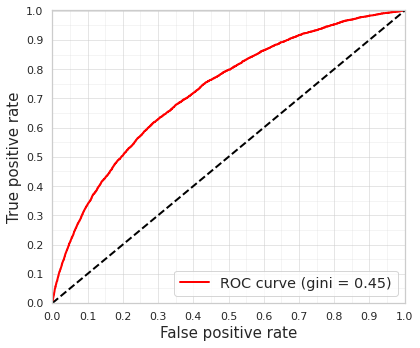

In [ ]:
import matplotlib.pyplot as plt
plot_roc_curve(y_train, X_train.PD, width=6, height=5)

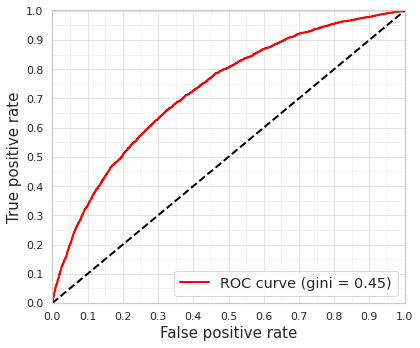

In [ ]:
import matplotlib.pyplot as plt
plot_roc_curve(y_test, X_test.PD, width=6, height=5)

In [ ]:
X_test.to_csv('test_predicted.csv', index = 0)

# 9. Calibración

In [ ]:
from sklearn.calibration import calibration_curve


In [ ]:
probs = logreg_class_weight.predict_proba(X_test[modelo])[:,1]
prob_true, prob_pred = calibration_curve(y_test, probs, n_bins=6, strategy = 'quantile')


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms


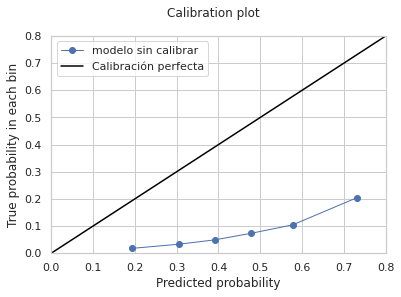

In [ ]:
fig, ax = plt.subplots()

plt.plot(prob_pred, prob_true, marker='o', linewidth=1, label='modelo sin calibrar')

# reference line, legends, and axis labels
plt.plot([0,1], [0,1], color='black', label="Calibración perfecta")
plt.xlim([0, 0.8])
plt.ylim([0, 0.8])

fig.suptitle('Calibration plot')
ax.set_xlabel('Predicted probability')
ax.set_ylabel('True probability in each bin')
plt.legend()
plt.show()

## Calibración Sigmoide

In [ ]:
from sklearn.calibration import CalibratedClassifierCV

In [ ]:
# define and fit calibration model
calibrated = CalibratedClassifierCV(logreg_class_weight, method='sigmoid', cv=5)
calibrated.fit(X_train[modelo], y_train)


CalibratedClassifierCV(base_estimator=LogisticRegression(class_weight={0: 1,
                                                                       1: 11.378319547235524},
                                                         max_iter=1000,
                                                         random_state=123),
                       cv=5)

In [ ]:
probs_cal_sigmoid = calibrated.predict_proba(X_test[modelo])[:, 1]
prob_true_cal_sigmoid, prob_pred_cal_sigmoid = calibration_curve(y_test, probs_cal_sigmoid, n_bins=6, strategy = 'quantile')


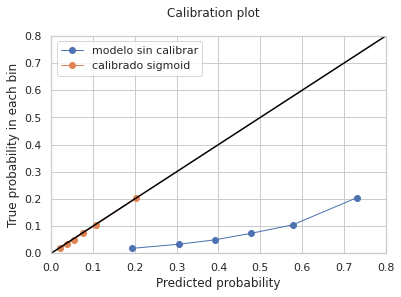

In [ ]:
fig, ax = plt.subplots()

plt.plot(prob_pred, prob_true, marker='o', linewidth=1, label='modelo sin calibrar')
plt.plot(prob_pred_cal_sigmoid, prob_true_cal_sigmoid, marker='o', linewidth=1, label='calibrado sigmoid')

# reference line, legends, and axis labels
plt.plot([0,1], [0,1], color='black')
plt.xlim([0, 0.8])
plt.ylim([0, 0.8])

fig.suptitle('Calibration plot')
ax.set_xlabel('Predicted probability')
ax.set_ylabel('True probability in each bin')
plt.legend()
plt.show()

## Calibración Isotonic

In [ ]:
from sklearn.calibration import CalibratedClassifierCV

In [ ]:
# define and fit calibration model
calibrated_iso = CalibratedClassifierCV(logreg_class_weight, method='isotonic', cv=5)
calibrated_iso.fit(X_train[modelo], y_train)


CalibratedClassifierCV(base_estimator=LogisticRegression(class_weight={0: 1,
                                                                       1: 11.378319547235524},
                                                         max_iter=1000,
                                                         random_state=123),
                       cv=5, method='isotonic')

In [ ]:
probs_cal_iso = calibrated_iso.predict_proba(X_test[modelo])[:, 1]
prob_true_cal_iso, prob_pred_cal_iso = calibration_curve(y_test, probs_cal_iso, n_bins=6, strategy = 'quantile')


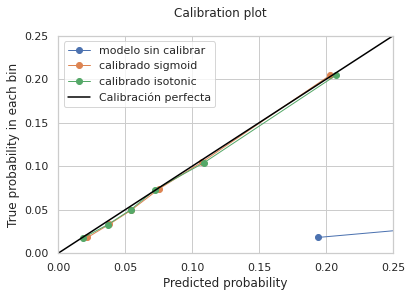

In [ ]:
fig, ax = plt.subplots()

plt.plot(prob_pred, prob_true, marker='o', linewidth=1, label='modelo sin calibrar')
plt.plot(prob_pred_cal_sigmoid, prob_true_cal_sigmoid, marker='o', linewidth=1, label='calibrado sigmoid')
plt.plot(prob_pred_cal_iso, prob_true_cal_iso, marker='o', linewidth=1, label='calibrado isotonic')

# reference line, legends, and axis labels
plt.plot([0,1], [0,1], color='black', label="Calibración perfecta")
plt.xlim([0, 0.25])
plt.ylim([0, 0.25])

fig.suptitle('Calibration plot')
ax.set_xlabel('Predicted probability')
ax.set_ylabel('True probability in each bin')
plt.legend()
plt.show()

## Calibración por drivers

In [ ]:
X_train_toCal = X_train[modelo + ['Client_Income_tric_imp_log_fitted', 'Default']].copy()
X_test_toCal = X_test[modelo + ['Client_Income_tric_imp_log_fitted', 'Default']].copy()


In [ ]:
X_train_toCal['PD'] = logreg_class_weight.predict_proba(X_train_toCal[modelo])[:, 1]
X_train_toCal['XB'] = X_train_toCal.PD.apply(lambda x: -log(1/x - 1) if x > 0
                                                     else log(0.0001))

X_test_toCal['PD'] = logreg_class_weight.predict_proba(X_test_toCal[modelo])[:, 1]
X_test_toCal['XB'] = X_test_toCal.PD.apply(lambda x: -log(1/x - 1) if x > 0
                                                     else log(0.0001))

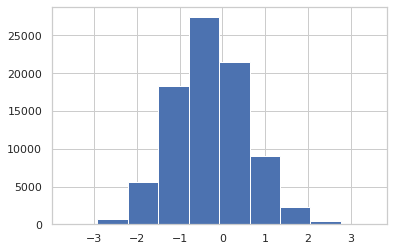

In [ ]:
X_train_toCal['XB'].hist()

In [ ]:
# Calibrado por drivers
from sklearn import linear_model

log_cal = linear_model.LogisticRegression(max_iter = 1000,
                                       random_state = 123)

log_cal.fit(X_train_toCal[['XB', 'Client_Income_tric_imp_log_fitted']], y_train)


LogisticRegression(max_iter=1000, random_state=123)

In [ ]:
probs_cal_drivers = log_cal.predict_proba(X_test_toCal[['XB', 'Client_Income_tric_imp_log_fitted']])[:, 1]
prob_true_cal_crivers, prob_pred_cal_drivers = calibration_curve(y_test, probs_cal_drivers, n_bins=6, strategy = 'quantile')


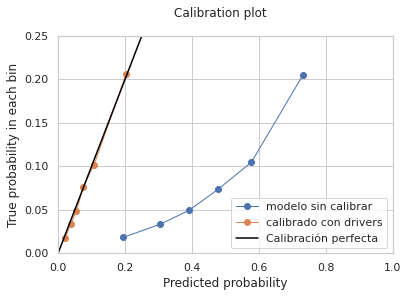

In [ ]:
fig, ax = plt.subplots()

plt.plot(prob_pred, prob_true, marker='o', linewidth=1, label='modelo sin calibrar')
plt.plot(prob_pred_cal_drivers, prob_true_cal_crivers, marker='o', linewidth=1, label='calibrado con drivers')

# reference line, legends, and axis labels
plt.plot([0,1], [0,1], color='black', label="Calibración perfecta")
plt.xlim([0, 0.25])
plt.ylim([0, 0.25])

fig.suptitle('Calibration plot')
ax.set_xlabel('Predicted probability')
ax.set_ylabel('True probability in each bin')
plt.legend()
plt.show()

In [ ]:
# Analizando los parámetros del modelo
paramLogistic_cal = pd.DataFrame({'feature': ['XB', 'Client_Income_tric_imp_log_fitted'],
                                 'parámetro': log_cal.coef_.ravel()})
paramLogistic_cal

,feature,parámetro
0,XB,0.975213
1,Client_Income_tric_imp_log_fitted,0.605801


In [ ]:
0.605801/(0.975213 + 0.605801)

0.38317244502578723

In [ ]:
# Gini del modelo (lo normal es que este arriba de 40%)
gini_cal = sklearn.metrics.roc_auc_score(y_test,
                                         log_cal.predict_proba(X_test_toCal[['XB', 'Client_Income_tric_imp_log_fitted']])[:,1])*2-1

print(f'El gini del modelo sin balancear es: {gini_log}')
print(f'El gini del modelo balanceado por pesos es: {gini_weith}')
print(f'El gini del modelo balanceado por smote es: {gini_smote}')
print(f'El gini del modelo calibrado es: {gini_cal}')



El gini del modelo sin balancear es: 0.4574676782231879
El gini del modelo balanceado por pesos es: 0.4585898658055385
El gini del modelo balanceado por smote es: 0.45585882519153964
El gini del modelo calibrado es: 0.45862818814074435


---
## Gracias por completar este laboratorio!